## Data preparation for CHD

In [12]:
# import libraries
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def csv_to_dataframe(folder_path):
    """
    Read all the csv files in the given folder and concatanate them into a single dataframe
    """
    df_list = []
    csv_files = glob.glob(folder_path)

    for filename in csv_files:
        df = pd.read_csv(filename)
        df_list.append(df)
    
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df


In [3]:
inp_folder_path = "/INPT 2015-2023 Q1-Q3/*.csv"
#ed_folder_path = "C:/Users/Sruthi/Downloads/ED 2015-2023Q1-Q3/*.csv"

inp_df = csv_to_dataframe(inp_folder_path)
#ed_df = csv_to_dataframe(ed_folder_path)

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_9660\2758100346.py:9: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
C:\Users\Sruthi\AppData\Local\Temp\ipykernel_9660\2758100346.py:9: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
C:\Users\Sruthi\AppData\Local\Temp\ipykernel_9660\2758100346.py:9: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
C:\Users\Sruthi\AppData\Local\Temp\ipykernel_9660\2758100346.py:9: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
C:\Users\Sruthi\AppData\Local\Temp\ipykernel_9660\2758100346.py:9: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
C:\Users\Sruthi

In [4]:
# print the dimensions
print(f"inpatient data: {inp_df.shape}")
#print(f"outpatient/ed data: {ed_df.shape}")

inpatient data: (3510615, 198)


In [9]:
# ICD-10 CM codes for CHD
chd_icd_10_list = ['J44.0','J44.1','J44.9']

# HD MSDRG's dictionary


county_dict = {
    1: "Alachua",
    2: "Baker",
    3: "Bay",
    4: "Bradford",
    5: "Brevard",
    6: "Broward",
    7: "Calhoun",
    8: "Charlotte",
    9: "Citrus",
    10: "Clay",
    11: "Collier",
    12: "Columbia",
    13: "Miami-Dade",
    14: "DeSoto",
    15: "Dixie",
    16: "Duval",
    17: "Escambia",
    18: "Flagler",
    19: "Franklin",
    20: "Gadsden",
    21: "Gilchrist",
    22: "Glades",
    23: "Gulf",
    24: "Hamilton",
    25: "Hardee",
    26: "Hendry",
    27: "Hernando",
    28: "Highlands",
    29: "Hillsborough",
    30: "Holmes",
    31: "Indian River",
    32: "Jackson",
    33: "Jefferson",
    34: "Lafayette",
    35: "Lake",
    36: "Lee",
    37: "Leon",
    38: "Levy",
    39: "Liberty",
    40: "Madison",
    41: "Manatee",
    42: "Marion",
    43: "Martin",
    44: "Monroe",
    45: "Nassau",
    46: "Okaloosa",
    47: "Okeechobee",
    48: "Orange",
    49: "Osceola",
    50: "Palm Beach",
    51: "Pasco",
    52: "Pinellas",
    53: "Polk",
    54: "Putnam",
    55: "St. Johns",
    56: "St. Lucie",
    57: "Santa Rosa",
    58: "Sarasota",
    59: "Seminole",
    60: "Sumter",
    61: "Suwannee",
    62: "Taylor",
    63: "Union",
    64: "Volusia",
    65: "Wakulla",
    66: "Walton",
    67: "Washington",
    99: "Unknown"
}



In [24]:
inp_df.head(1).to_string()

'   SYS_RECID  YEAR  QTR  FACLNBR MCARE_NBR  PRO_CODE MOD_CODE FAC_REGION FAC_COUNTY SEX ETHNICITY  RACE  AGE  TYPE_SERV  DISCHSTAT  LOSDAYS  ADM_PRIOR ADMSRC CONDTN  EDHR_ARR  ADM_TIME  DIS_TIME PAYER  ZIPCODE PTSTATE  PTCOUNTY PTCOUNTRY  MSDRG ADMITDIAG PRINDIAG OTHDIAG1 OTHDIAG2 OTHDIAG3 OTHDIAG4 OTHDIAG5 OTHDIAG6 OTHDIAG7 OTHDIAG8 OTHDIAG9 OTHDIAG10 OTHDIAG11 OTHDIAG12 OTHDIAG13 OTHDIAG14 OTHDIAG15 OTHDIAG16 OTHDIAG17 OTHDIAG18 OTHDIAG19 OTHDIAG20 OTHDIAG21 OTHDIAG22 OTHDIAG23 OTHDIAG24 OTHDIAG25 OTHDIAG26 OTHDIAG27 OTHDIAG28 OTHDIAG29 OTHDIAG30 POA_PRIN_DIAG POA1 POA2 POA3 POA4 POA5 POA6 POA7 POA8 POA9 POA10 POA11 POA12 POA13 POA14 POA15 POA16 POA17 POA18 POA19 POA20 POA21 POA22 POA23 POA24 POA25 POA26 POA27 POA28 POA29 POA30 ECMORB1 ECMORB2 ECMORB3 POA_ECMORB1 POA_ECMORB2 POA_ECMORB3 PRINPROC OTHPROC1 OTHPROC2 OTHPROC3 OTHPROC4 OTHPROC5 OTHPROC6 OTHPROC7 OTHPROC8 OTHPROC9 OTHPROC10 OTHPROC11 OTHPROC12 OTHPROC13 OTHPROC14 OTHPROC15 OTHPROC16 OTHPROC17 OTHPROC18 OTHPROC19 OTHPROC20

In [10]:
# filter patients diagnosed with CHD in outpatient data using ICD-10 CM codes
prindiag_col = inp_df[['PRINDIAG']]
othdiag_cols = inp_df.filter(regex='^OTHDIAG\d+$')
selected_cols = pd.concat([prindiag_col, othdiag_cols], axis=1)

def check_icd_codes_in_rows(row):
    return any(code in row.values for code in chd_icd_10_list)

selected_rows = selected_cols.apply(check_icd_codes_in_rows, axis=1)
chd_ed_df = inp_df[selected_rows]

print(f"IN CHD data: {chd_ed_df.shape}")

IN CHD data: (836631, 198)


In [13]:
chd_ed_df.to_csv("/inp.csv")

## EDA

In [ ]:
# read the inpatient
import pandas as pd
copd_inp_df = pd.read_csv("/inp.csv")


In [2]:
# drop unnecessary columns


inp_drop_columns = [
    "SYS_RECID", "FACLNBR", "MCARE_NBR", "PRO_CODE", "MOD_CODE", "FAC_REGION",
    "ETHNICITY", "RACE", "TYPE_SERV", "ADM_PRIOR", "ADMSRC", "CONDTN", "EDHR_ARR",
    "ADM_TIME", "DIS_TIME", "PAYER", "ZIPCODE", "MSDRG", "ADMITDIAG", "POA_PRIN_DIAG", "POA1", "POA2", "POA3",
    "POA4", "POA5", "POA6", "POA7", "POA8", "POA9", "POA10", "POA11", "POA12", "POA13", "POA14", "POA15", "POA16",
    "POA17", "POA18", "POA19", "POA20", "POA21", "POA22", "POA23", "POA24", "POA25", "POA26", "POA27", "POA28",
    "POA29", "POA30", "ECMORB1", "ECMORB2", "ECMORB3", "POA_ECMORB1", "POA_ECMORB2", "POA_ECMORB3", "WEEKDAY", "DAYSPROC", "DAYS_PROC1", "DAYS_PROC2",
    "DAYS_PROC3", "DAYS_PROC4", "DAYS_PROC5", "DAYS_PROC6", "DAYS_PROC7", "DAYS_PROC8", "DAYS_PROC9", "DAYS_PROC10",
    "DAYS_PROC11", "DAYS_PROC12", "DAYS_PROC13", "DAYS_PROC14", "DAYS_PROC15", "DAYS_PROC16", "DAYS_PROC17",
    "DAYS_PROC18", "DAYS_PROC19", "DAYS_PROC20", "DAYS_PROC21", "DAYS_PROC22", "DAYS_PROC23", "DAYS_PROC24",
    "DAYS_PROC25", "DAYS_PROC26", "DAYS_PROC27", "DAYS_PROC28", "DAYS_PROC29", "DAYS_PROC30", "ROOMCHGS",
    "NUR1CHGS", "NUR2CHGS", "NUR3CHGS", "ICUCHGS", "CCUCHGS", "PHARMCHGS", "MEDCHGS", "ONCOCHGS", "LABCHGS",
    "RADCHGS", "OPRMCHGS", "ANESCHGS", "RESPCHGS", "PHYTHCHGS", "OCCUPCHGS", "SPEECHGS", "ERCHGS", "CARDIOCHGS",
    "TRAUMACHGS", "RECOVCHGS", "LABORCHGS", "OBSERCHGS", "BEHAVCHGS", "OTHERCHGS", "TCHGS", "ATTEN_PHYID",
    "COMPREHABCHGS", "PAYER_NAME", "CERT_DATE","Unnamed"]


# drop unnecessary inpatient columns
copd_inp_df = copd_inp_df.drop(columns=inp_drop_columns, errors="ignore")


In [3]:
print(copd_inp_df.dtypes)

Unnamed: 0          int64
YEAR                int64
QTR                 int64
FAC_COUNTY         object
SEX                object
                    ...  
OTHOPER_PHYID      object
OTHOPER_PHYNPI     object
FAC_NAME           object
FAC_COUNTY_NAME    object
PTCOUNTY_NAME      object
Length: 81, dtype: object


In [4]:
# bucketize age groups
age_bins = [1, 34, 44, 54, 64, 74, 84, float('inf')]
age_labels = ["<35", "35-44", "45-54", "55-64", "65-74", "75-84", ">=85"]

copd_inp_df["AGE_GROUP"] = pd.cut(copd_inp_df["AGE"], bins=age_bins, labels=age_labels, include_lowest=True)


copd_inp_df["AGE_GROUP"] = copd_inp_df["AGE_GROUP"].astype("object")


copd_inp_df.loc[copd_inp_df["AGE"] == 0, "AGE_GROUP"] = "New Born(0-28 days)"
copd_inp_df.loc[copd_inp_df["AGE"] == 777, "AGE_GROUP"] = "Infant(29-364 days)"
copd_inp_df.loc[copd_inp_df["AGE"] == 888, "AGE_GROUP"] = ">=85"
copd_inp_df.loc[copd_inp_df["AGE"] > 100, "AGE_GROUP"] = ">=85"



In [5]:
# seperate diagnosed and treated people into residents(FL) and tourists.
inp_state_filter = copd_inp_df["PTSTATE"] == "FL"


copd_inp_df["RESIDENT_TYPE"] = None


copd_inp_df.loc[inp_state_filter, "RESIDENT_TYPE"] = "Resident"
copd_inp_df.loc[~inp_state_filter, "RESIDENT_TYPE"] = "Non Resident"


print(copd_inp_df)

        Unnamed: 0  YEAR  QTR FAC_COUNTY SEX  AGE  DISCHSTAT  LOSDAYS PTSTATE  \
0               10  2015    4          5   F   97          1        5      FL   
1               19  2015    4         11   M   91          3        4      FL   
2               51  2015    4         42   M   84          1        4      FL   
3               71  2015    4         31   M   82          1        7      FL   
4               81  2015    4         60   M   82          3       10      FL   
...            ...   ...  ...        ...  ..  ...        ...      ...     ...   
836626     3510588  2023    3          9   M   71          3       16      FL   
836627     3510591  2023    3         56   M   70          6        6      FL   
836628     3510609  2023    3         13   M   65          1        5      FL   
836629     3510612  2023    3         52   M   74          6        2      XX   
836630     3510614  2023    3         10   F   61          7        1      FL   

        PTCOUNTY  ... ATTEN

In [6]:
copd_inp_df["DIAGNOSIS"] = None
copd_inp_df.rename(columns={'PRINDIAG': 'OTHDIAG31'}, inplace=True)


for i in range(1, 32):
    column_name = 'OTHDIAG{}'.format(i)
    copd_inp_df.loc[copd_inp_df[column_name].isin(['J44.0','J44.1','J44.9']),"DIAGNOSIS"]="COPD Diag"

copd_inp_df.rename(columns={'OTHDIAG31':'PRINDIAG'}, inplace=True)


In [20]:

copd_inp_df.rename(columns={'PRINPROC': 'OTHPROC31'}, inplace=True)

copd_inp_df["PROCEDURE"] = None
for i in range(1, 32):
    column_name = 'OTHPROC{}'.format(i)
    copd_inp_df.loc[copd_inp_df[column_name].isin(['0BBC0ZZ','0BBC4ZZ','0BBD0ZZ','0BBD4ZZ','0BBF0ZZ','0BBF4ZZ','0BBG0ZZ','0BBG4ZZ','0BBH0ZZ','0BBH4ZZ',
                                                      '0BBJ0ZZ','0BBJ4ZZ','0BBK0ZZ','0BBK4ZZ','0BBL0ZZ','0BBL4ZZ','0BBM0ZZ','0BBM4ZZ']),"PROCEDURE"]="LVR"
    copd_inp_df.loc[copd_inp_df[column_name].isin(['0BH17EZ','0BH18EZ','0BH37EZ']),"PROCEDURE"]="LungTrans"
    copd_inp_df.loc[copd_inp_df[column_name].isin(['0W993ZZ','0W9B3ZZ','0W993ZX']),"PROCEDURE"]="PleuralProc"
    copd_inp_df.loc[copd_inp_df[column_name].isin(['5A09457','5A09357','5A1945Z','5A1955Z','5A1935Z','5A09557']),"PROCEDURE"]="MechanicalVentilation"

    
copd_inp_df.rename(columns={'OTHPROC31':'PRINPROC'}, inplace=True)    



In [7]:
import numpy as np
copd_inp_df.replace(" ", np.nan,inplace=True)
print(copd_inp_df.isna().sum())

Unnamed: 0              0
YEAR                    0
QTR                     0
FAC_COUNTY            438
SEX                     0
                    ...  
FAC_COUNTY_NAME    761131
PTCOUNTY_NAME      760693
AGE_GROUP               0
RESIDENT_TYPE           0
DIAGNOSIS               0
Length: 84, dtype: int64


In [8]:
# imputing null values in PTCOUNTY_NAME and FAC_COUNTY_NAME 
county_dict = {
    1: "Alachua",
    2: "Baker",
    3: "Bay",
    4: "Bradford",
    5: "Brevard",
    6: "Broward",
    7: "Calhoun",
    8: "Charlotte",
    9: "Citrus",
    10: "Clay",
    11: "Collier",
    12: "Columbia",
    13: "Miami-Dade",
    14: "DeSoto",
    15: "Dixie",
    16: "Duval",
    17: "Escambia",
    18: "Flagler",
    19: "Franklin",
    20: "Gadsden",
    21: "Gilchrist",
    22: "Glades",
    23: "Gulf",
    24: "Hamilton",
    25: "Hardee",
    26: "Hendry",
    27: "Hernando",
    28: "Highlands",
    29: "Hillsborough",
    30: "Holmes",
    31: "Indian River",
    32: "Jackson",
    33: "Jefferson",
    34: "Lafayette",
    35: "Lake",
    36: "Lee",
    37: "Leon",
    38: "Levy",
    39: "Liberty",
    40: "Madison",
    41: "Manatee",
    42: "Marion",
    43: "Martin",
    44: "Monroe",
    45: "Nassau",
    46: "Okaloosa",
    47: "Okeechobee",
    48: "Orange",
    49: "Osceola",
    50: "Palm Beach",
    51: "Pasco",
    52: "Pinellas",
    53: "Polk",
    54: "Putnam",
    55: "St. Johns",
    56: "St. Lucie",
    57: "Santa Rosa",
    58: "Sarasota",
    59: "Seminole",
    60: "Sumter",
    61: "Suwannee",
    62: "Taylor",
    63: "Union",
    64: "Volusia",
    65: "Wakulla",
    66: "Walton",
    67: "Washington",
    99: "Unknown"
}

# convert fac_county into integer
inp_mask = copd_inp_df["FAC_COUNTY"].notnull()
copd_inp_df.loc[inp_mask, "FAC_COUNTY"] = copd_inp_df.loc[inp_mask, "FAC_COUNTY"].astype(int)

copd_inp_df["FAC_COUNTY_NAME"] = copd_inp_df["FAC_COUNTY"].map(county_dict)
copd_inp_df["PTCOUNTY_NAME"] = copd_inp_df["PTCOUNTY"].map(county_dict)


In [9]:
copd_inp_df["YEAR_QTR"] = copd_inp_df["YEAR"].astype(str) + "QTR" + copd_inp_df["QTR"].astype(str)
chd_inp_diag_agg_by_fac = copd_inp_df.groupby(["YEAR", "QTR", "FAC_COUNTY_NAME"]).size().reset_index(name="DIAG_COUNT")

In [10]:
chd_inp_diag_agg_by_fac

YEAR  QTR FAC_COUNTY_NAME  DIAG_COUNT
0     2015    4         Alachua         593
1     2015    4           Baker           1
2     2015    4             Bay         421
3     2015    4        Bradford          38
4     2015    4         Brevard         876
...    ...  ...             ...         ...
1772  2023    3          Sumter         228
1773  2023    3          Taylor           5
1774  2023    3         Volusia         858
1775  2023    3          Walton          43
1776  2023    3      Washington          15

[1777 rows x 4 columns]

In [14]:
chd_inp_diag_agg_by_fac.to_excel("c:/users/sruthi/downloads/inp_diag.xlsx")

In [23]:
copd_inp_df["YEAR_QTR"] = copd_inp_df["YEAR"].astype(str) + "QTR" + copd_inp_df["QTR"].astype(str)
chd_inp_proc_agg_by_fac = copd_inp_df.groupby(["YEAR", "QTR", "FAC_COUNTY_NAME", "PROCEDURE"]).size().reset_index(name="PROC_COUNT")

treatments = ["LungTrans", "LVR", "PleuralProc","MechanicalVentilation"]



In [26]:
chd_inp_proc_agg_by_fac=copd_inp_df.groupby(["FAC_COUNTY_NAME","YEAR_QTR"]).size().reset_index(name="PROC_COUNT")
chd_inp_proc_agg_by_fac

FAC_COUNTY_NAME  YEAR_QTR  PROC_COUNT
0            Alachua  2015QTR4         593
1            Alachua  2016QTR1         610
2            Alachua  2016QTR2         565
3            Alachua  2016QTR3         523
4            Alachua  2016QTR4         576
...              ...       ...         ...
1772      Washington  2022QTR3          16
1773      Washington  2022QTR4          17
1774      Washington  2023QTR1           9
1775      Washington  2023QTR2          10
1776      Washington  2023QTR3          15

[1777 rows x 3 columns]

In [27]:
chd_inp_proc_agg_by_fac.to_excel("c:/users/sruthi/downloads/total_procedures.xlsx")

In [39]:
chd_inp_proc_agg_by_fac.isna().sum()

FAC_COUNTY_NAME    0
PROCEDURE          0
YEAR_QTR           0
PROC_COUNT         0
dtype: int64

In [43]:
train=chd_inp_proc_agg_by_fac.iloc[:-6,:]
test=chd_inp_proc_agg_by_fac.iloc[-6:,:]

In [ ]:
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
counties=chd_inp_diag_agg_by_fac["FAC_COUNTY_NAME"].unique()
for county in counties:
    sin_county=chd_inp_diag_agg_by_fac[chd_inp_diag_agg_by_fac["FAC_COUNTY_NAME"]==county]


    if sin_county.shape[0] >30:
        #splitratio=int(round(0.8*data.shape[0],0))
        train=sin_county
        #test=sin_county.iloc[-4:,:]
        data_count=train["DIAG_COUNT"]

        #model = auto_arima(data_count,Seasonal=False,m=3)
        model = auto_arima(data_count, seasonal=True, m=4, stepwise=True)
        #county = training['unique_id'].unique()[0]
        # Fit ARIMA model
        model.fit(data_count)
        print("-----------",county,"-----------------")
        #print("-----------",proc,"--------------")
        # Forecast future values
        forecast_steps = 16  # numbers yrs to forecast
        forecast = model.predict(n_periods=forecast_steps)
        #t1=test.copy()
        #t1=t1[::seasonality]
        t1['forecast']= np.array(forecast)
        MAE = mean_absolute_error(t1['DIAG_COUNT'], t1['forecast'])
        res = dict()
        res['MAE']=MAE
        res['MAPE']=mean_absolute_percentage_error(t1['DIAG_COUNT'], t1['forecast'])
        res['op']=t1
        print(res)

In [ ]:
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


counties = chd_inp_diag_agg_by_fac["FAC_COUNTY_NAME"].unique()
results_df = pd.DataFrame(columns=['county',"year_qtr" 'MAE', 'MAPE'])  # Create empty dataframe

for county in counties:
  sin_county = chd_inp_diag_agg_by_fac[chd_inp_diag_agg_by_fac["FAC_COUNTY_NAME"] == county]

  if sin_county.shape[0] > 30:
    train = sin_county
    data_count = train["DIAG_COUNT"]

    model = auto_arima(data_count, seasonal=True, m=4, stepwise=True)
    model.fit(data_count)

    forecast_steps = 16
    forecast = model.predict(n_periods=forecast_steps)

    MAE = mean_absolute_error(data_count, forecast)
    MAPE = mean_absolute_percentage_error(data_count, forecast)

    # Append results to dataframe
    results_df = results_df.append({'county': county, 'MAE': MAE, 'MAPE': MAPE}, ignore_index=True)



In [ ]:
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

counties = chd_inp_diag_agg_by_fac["FAC_COUNTY_NAME"].unique()
for county in counties:
    sin_county=chd_inp_diag_agg_by_fac[chd_inp_diag_agg_by_fac["FAC_COUNTY_NAME"]==county]


    if sin_county.shape[0] >30:
        #splitratio=int(round(0.8*data.shape[0],0))
        train=sin_county
        #test=sin_county.iloc[-4:,:]
        data_count=train["DIAG_COUNT"]

        #model = auto_arima(data_count,Seasonal=False,m=3)
        model = auto_arima(data_count, seasonal=True, m=4, stepwise=True)
        #county = training['unique_id'].unique()[0]
        # Fit ARIMA model
        model.fit(data_count)
        print("-----------",county,"-----------------")
        #print("-----------",proc,"--------------")
        # Forecast future values
        forecast_steps = 16  # numbers yrs to forecast
        forecast = model.predict(n_periods=forecast_steps)
        print(forecast)
        t1=test.copy()
        #t1=t1[::seasonality]
        t1['forecast']= np.array(forecast)
        MAE = mean_absolute_error(t1['DIAG_COUNT'], t1['forecast'])
        res = dict()
        res['MAE']=MAE
        res['MAPE']=mean_absolute_percentage_error(t1['DIAG_COUNT'], t1['forecast'])
        res['op']=t1
        print(res)

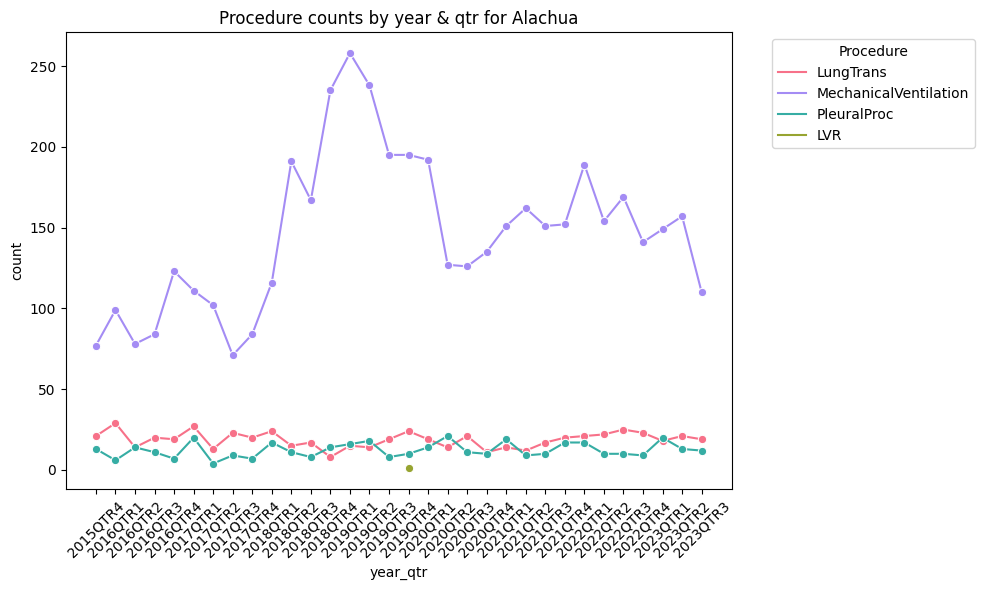

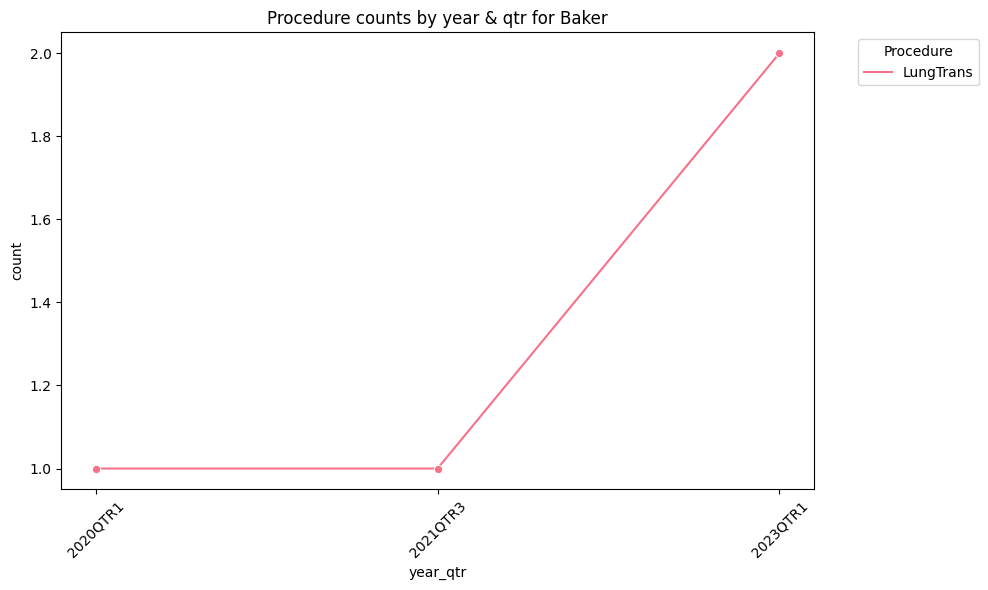

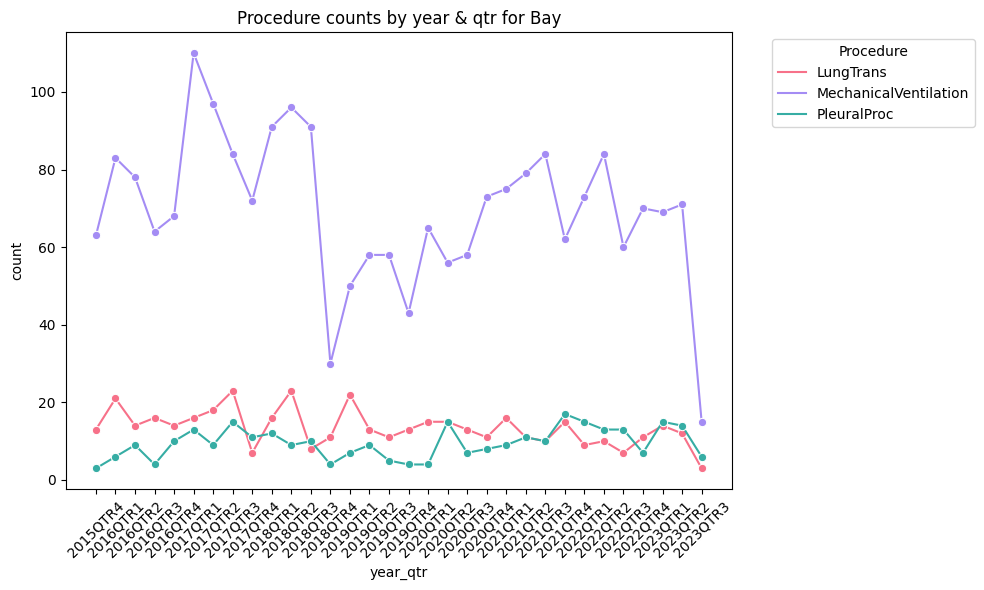

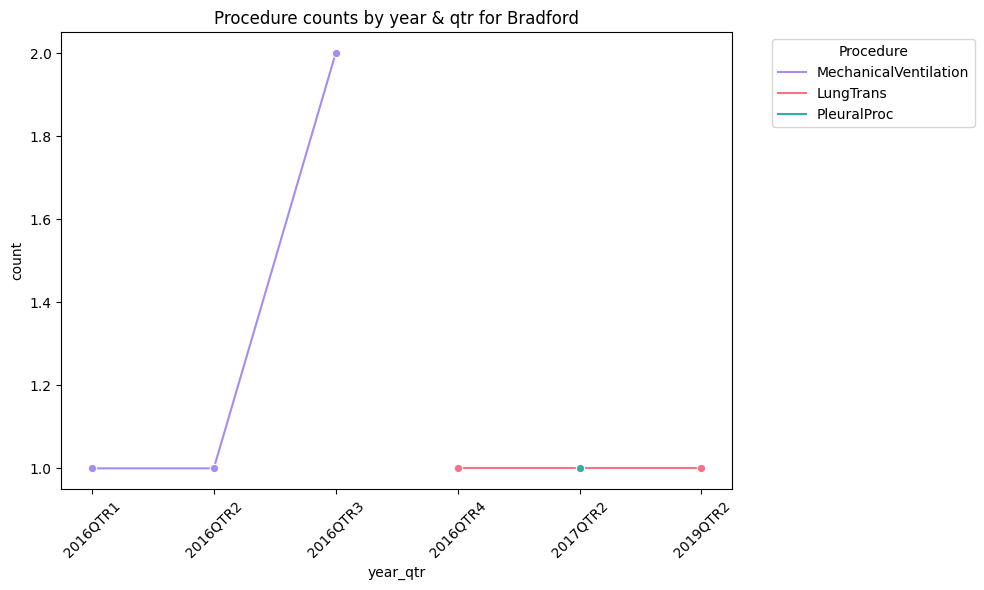

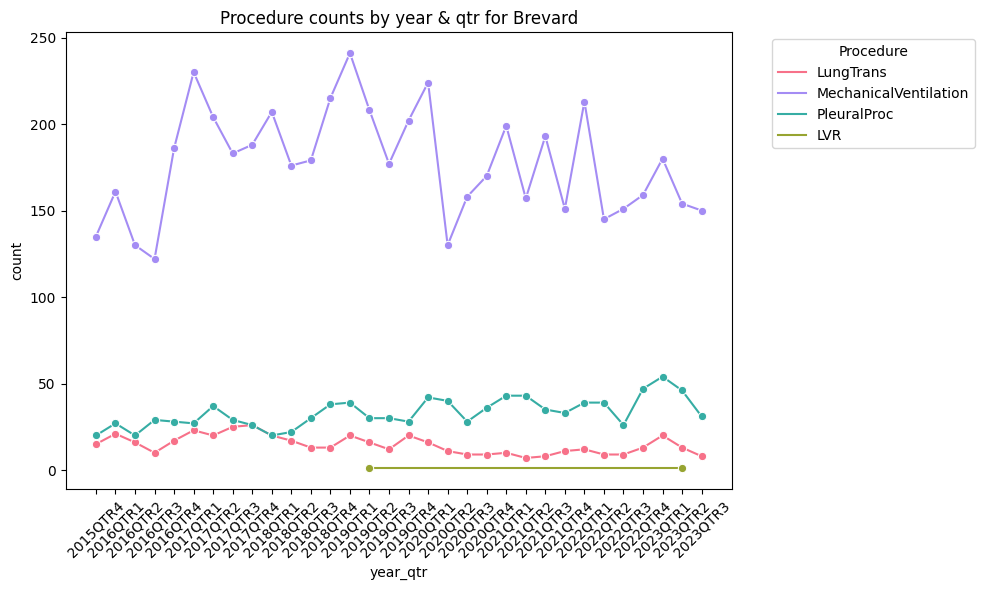

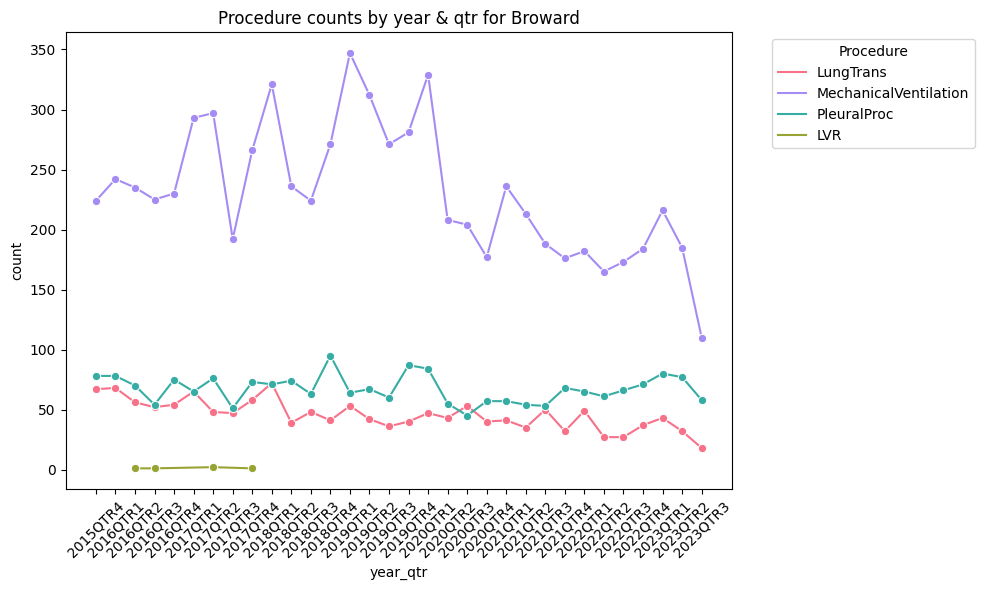

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


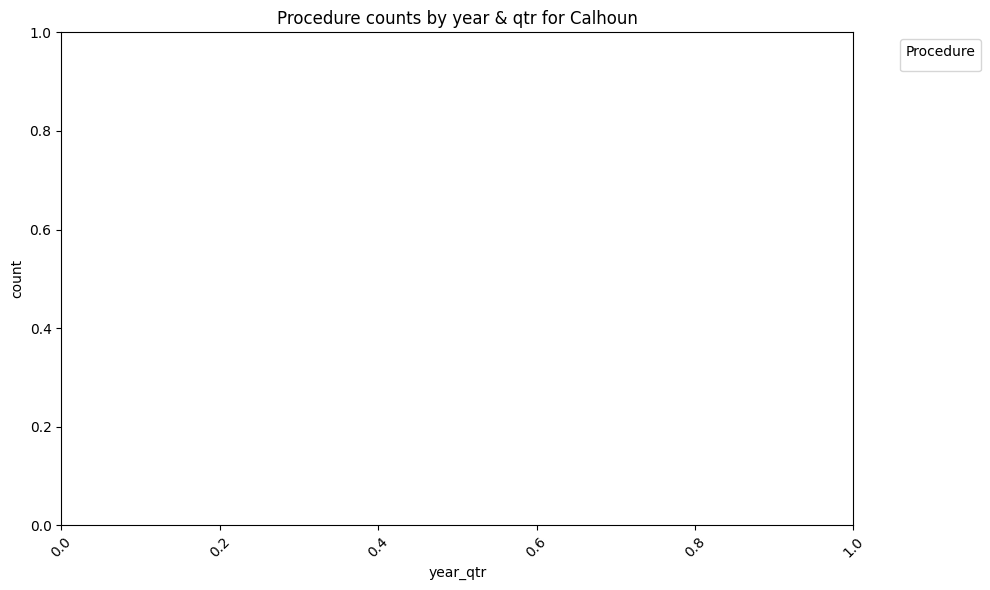

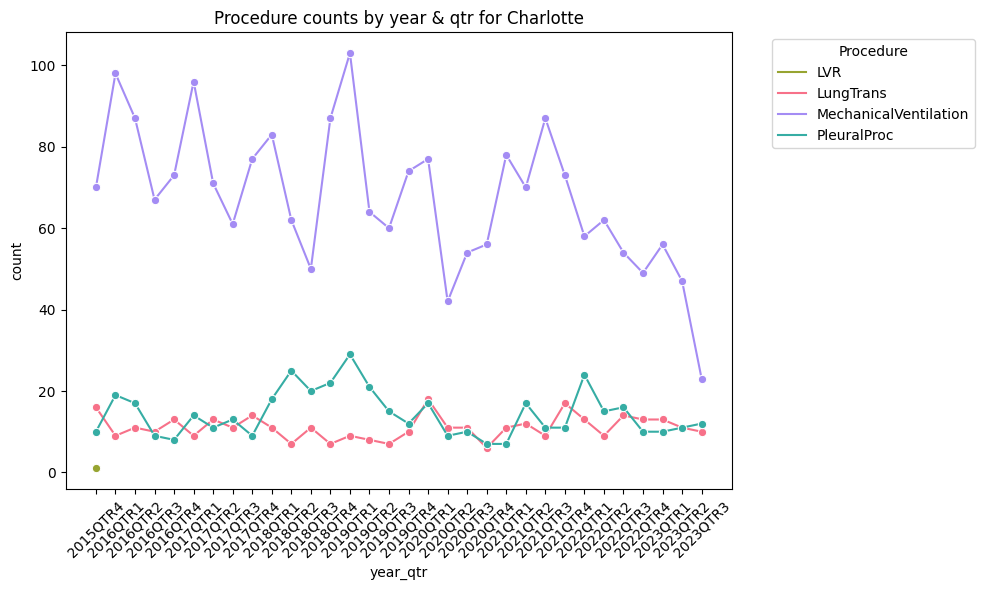

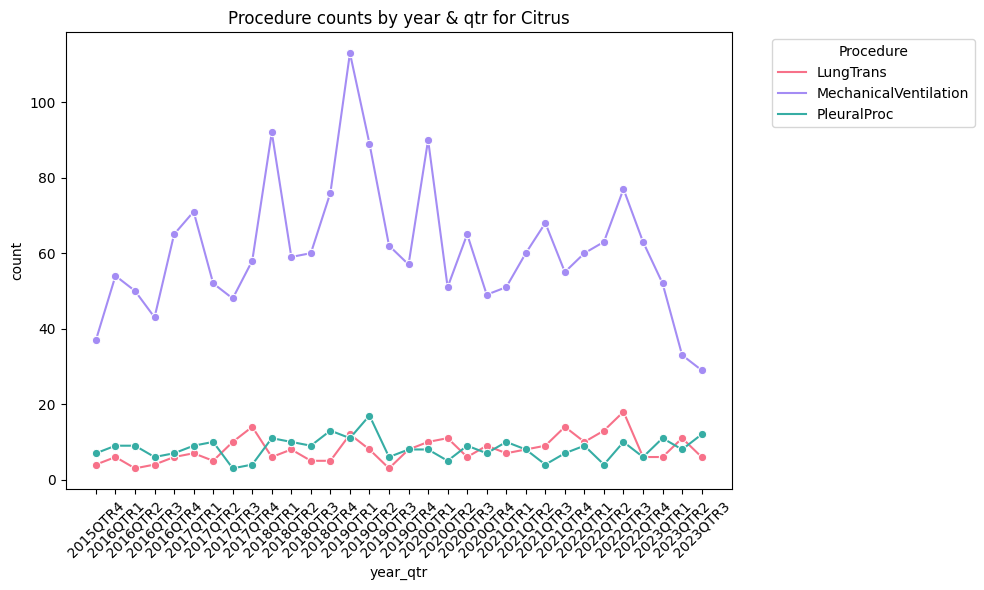

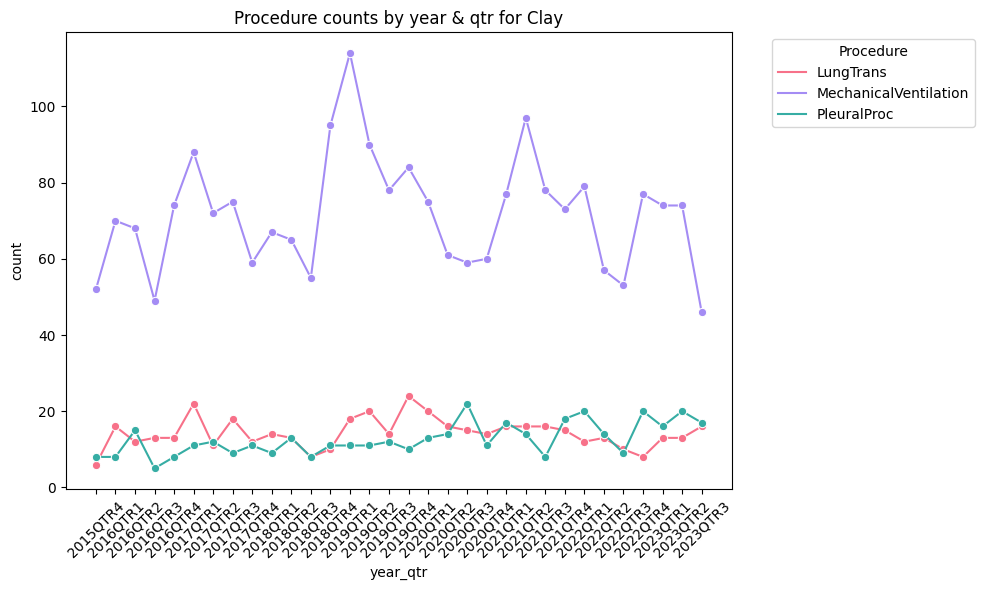

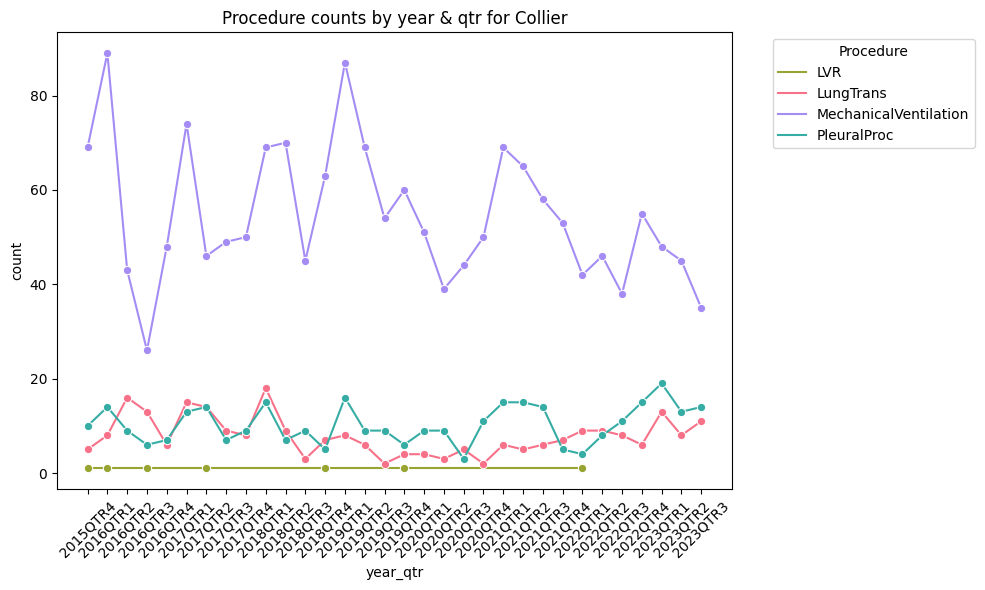

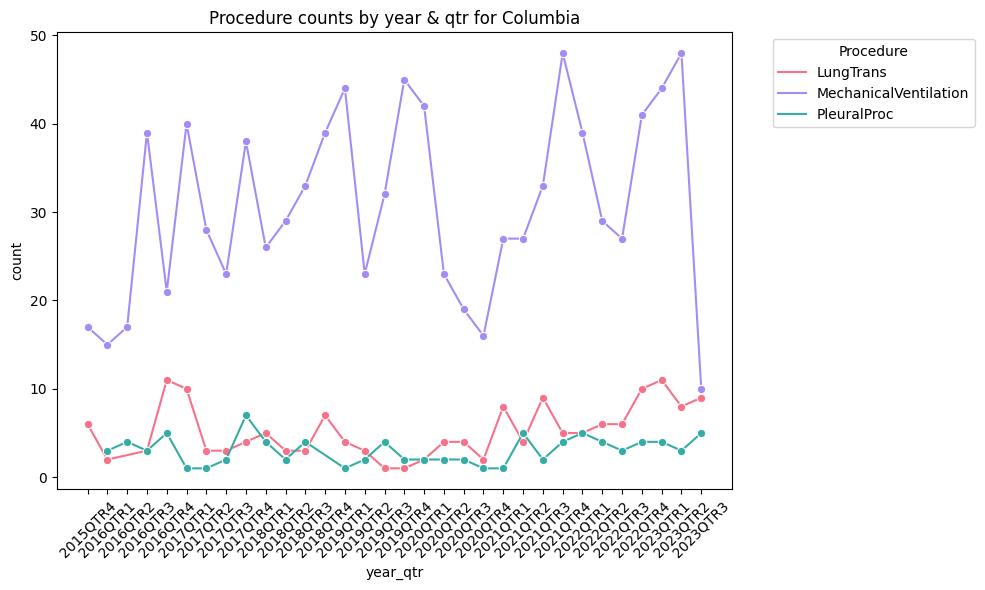

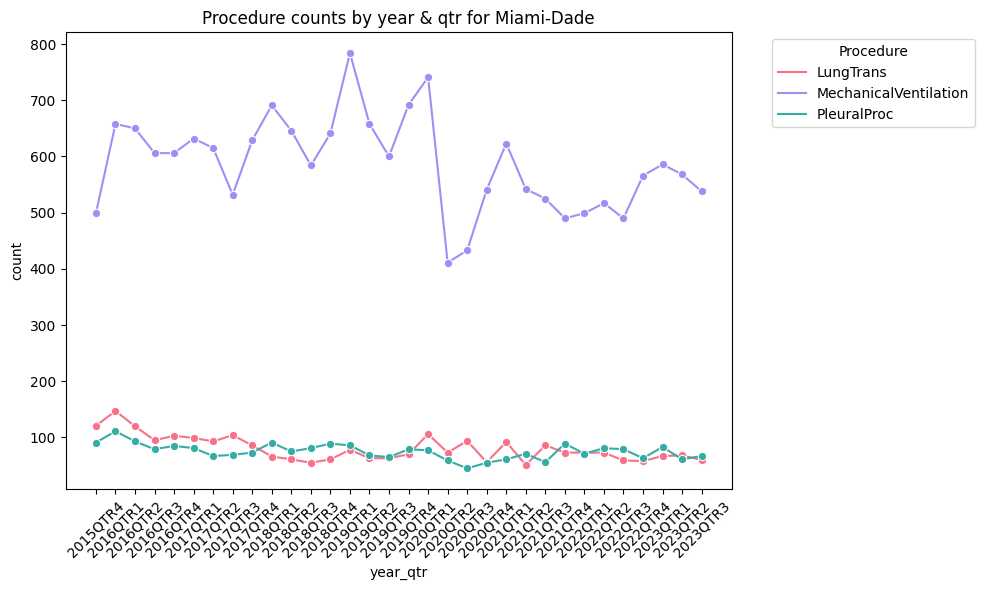

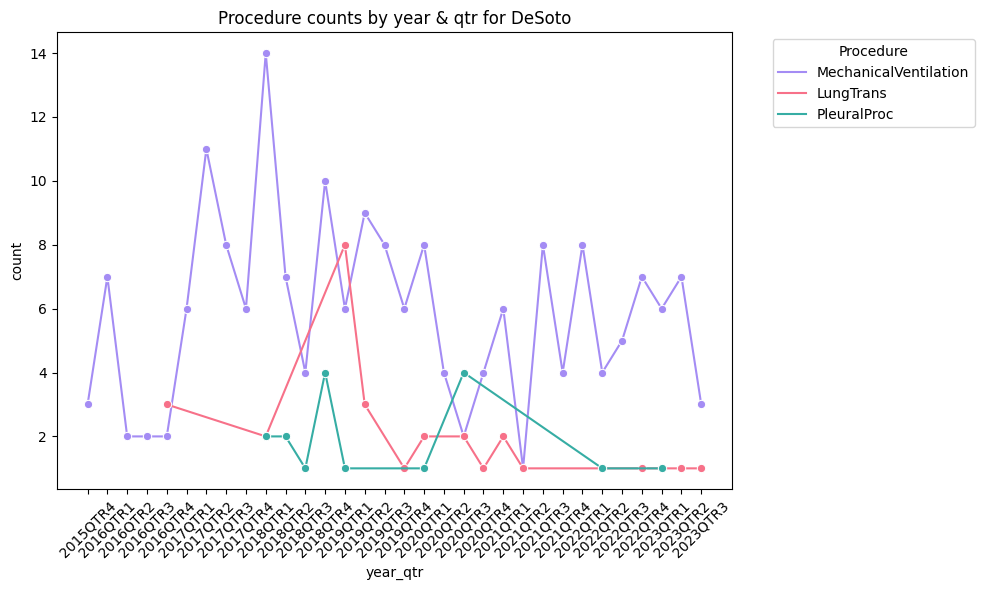

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


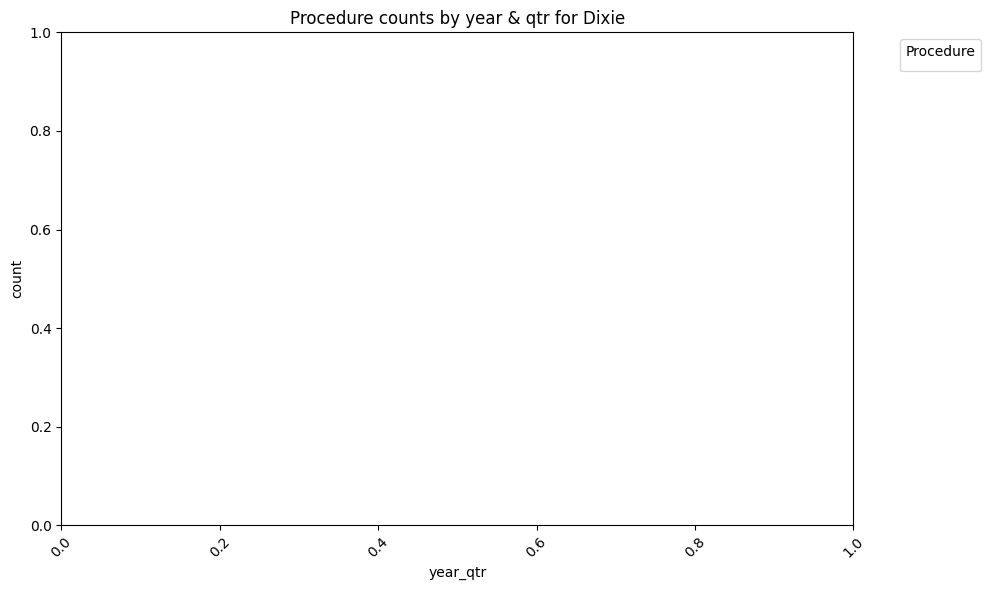

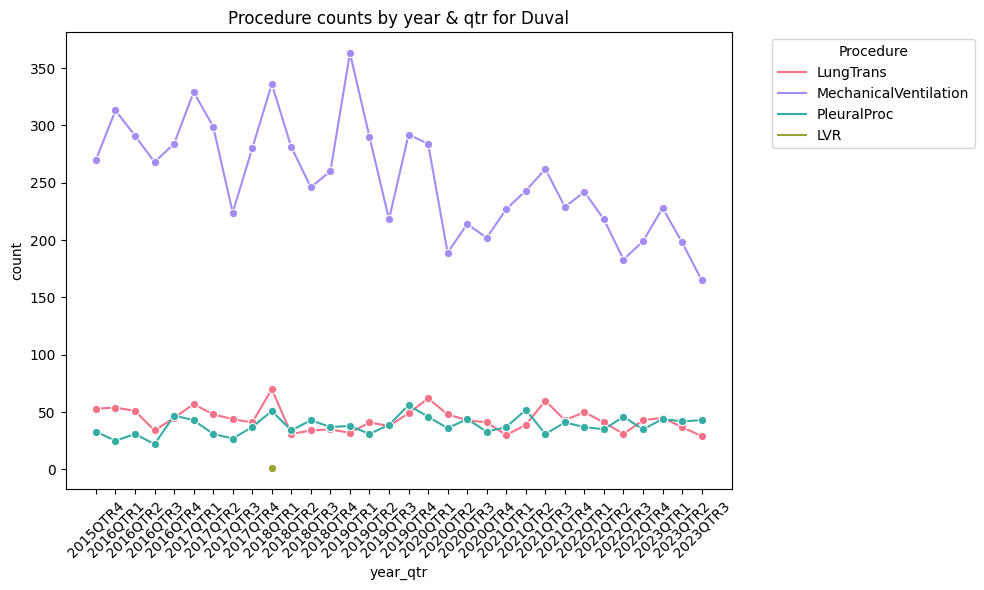

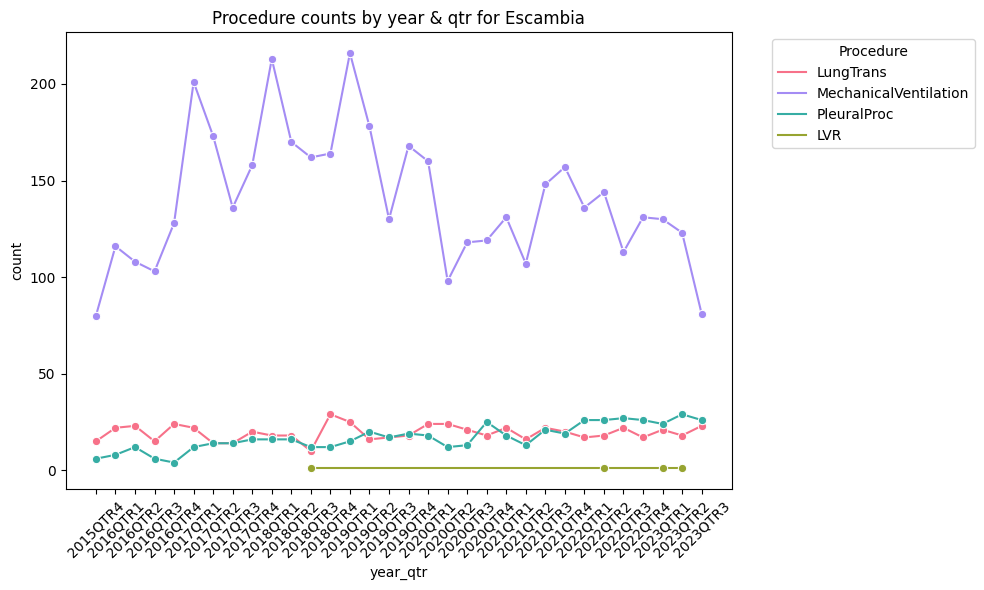

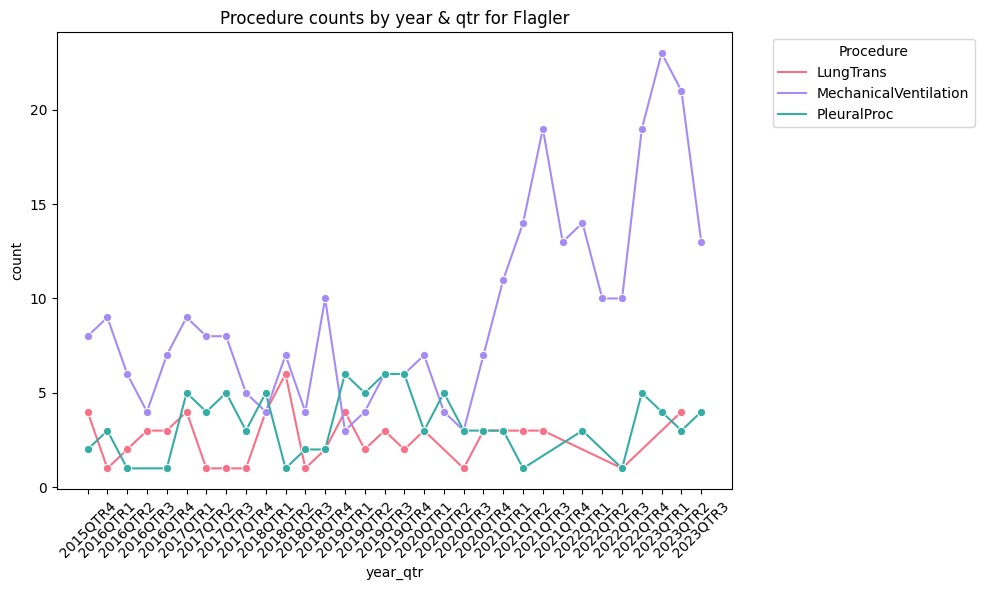

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


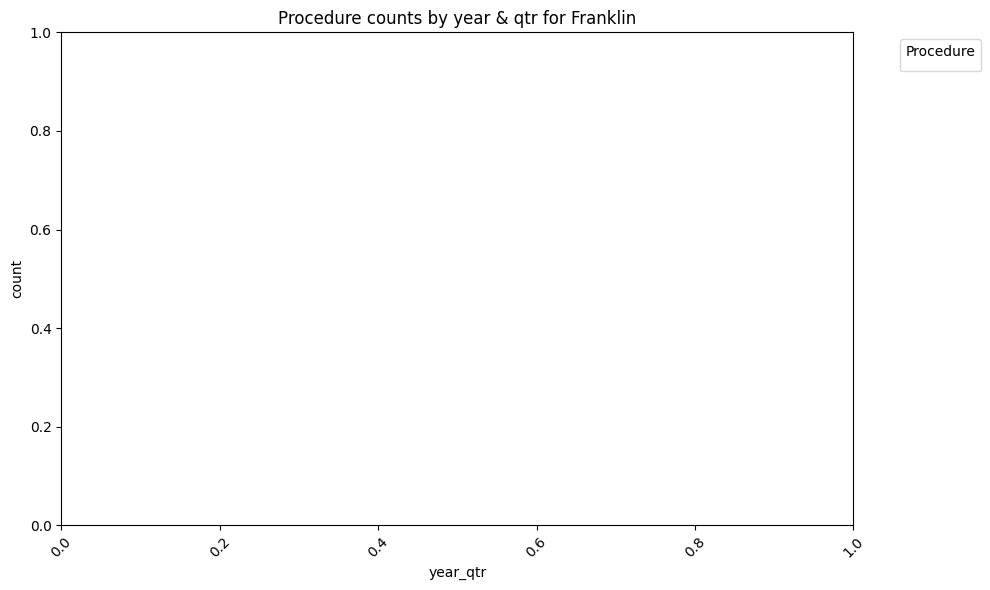

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


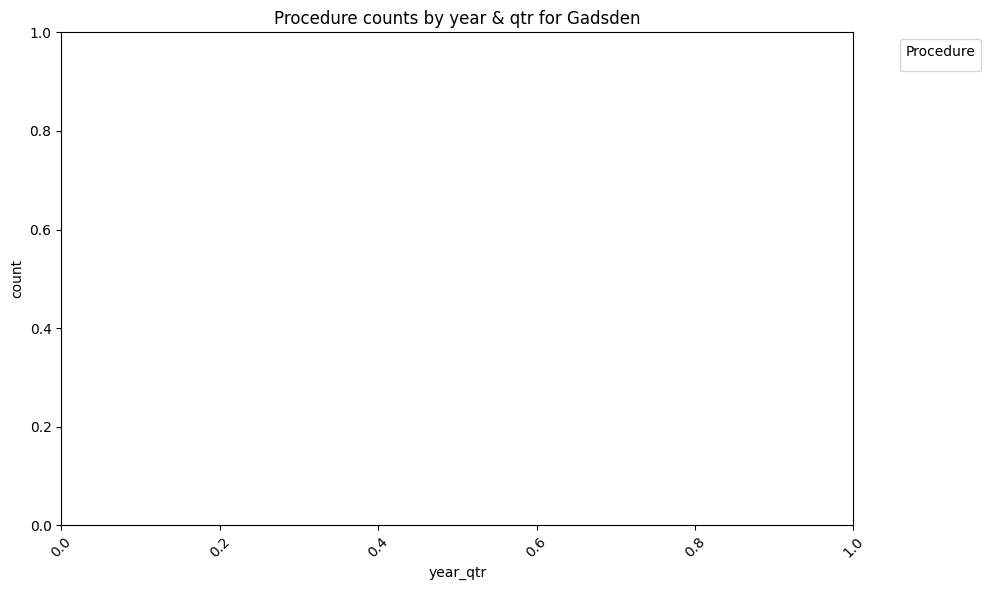

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


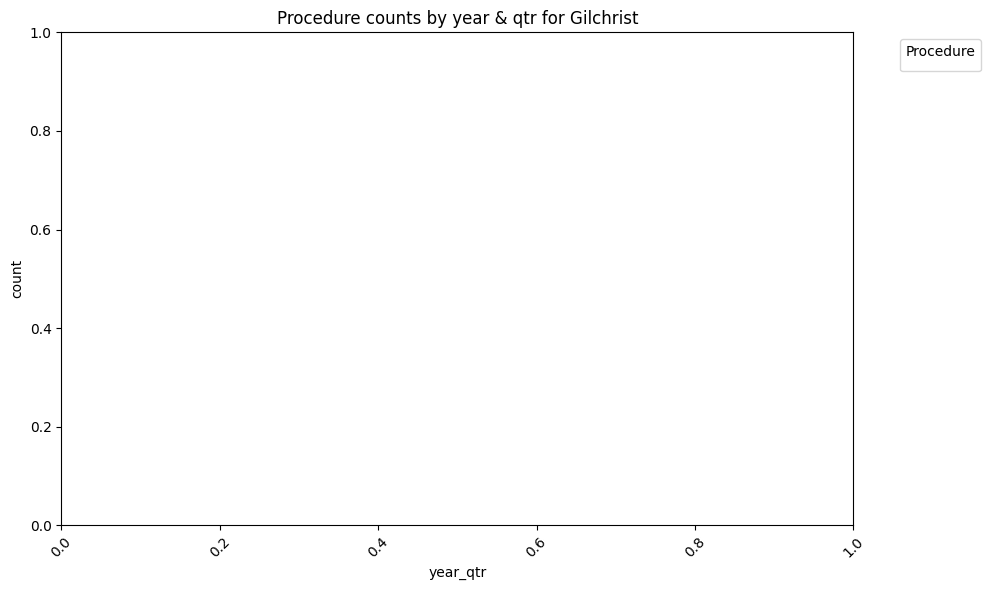

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


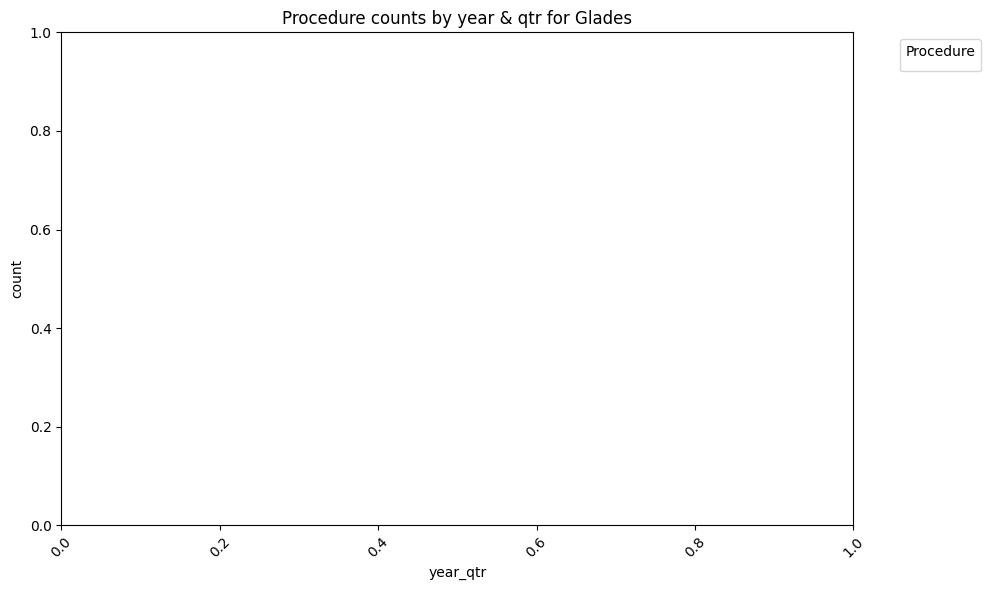

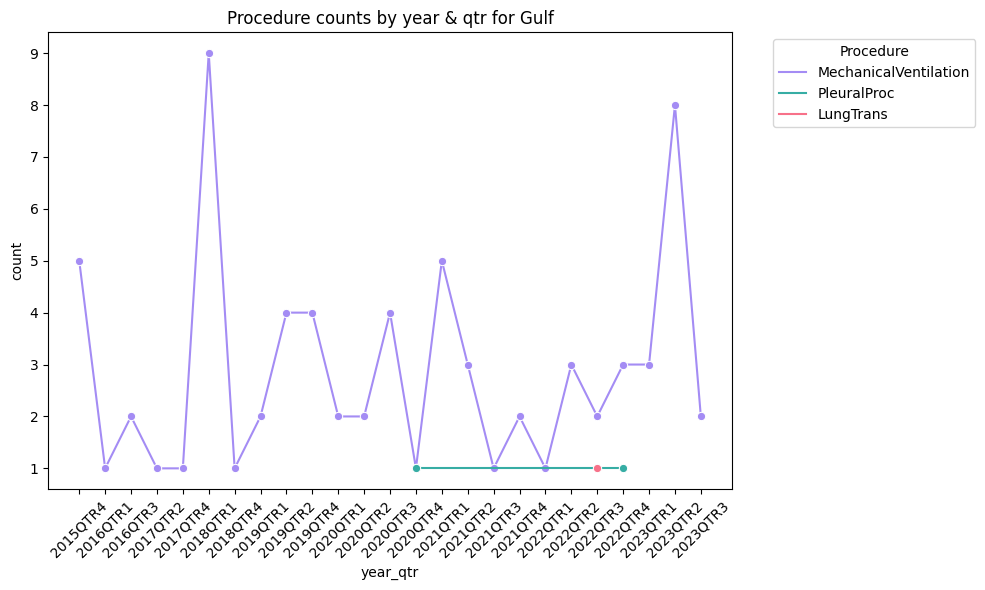

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


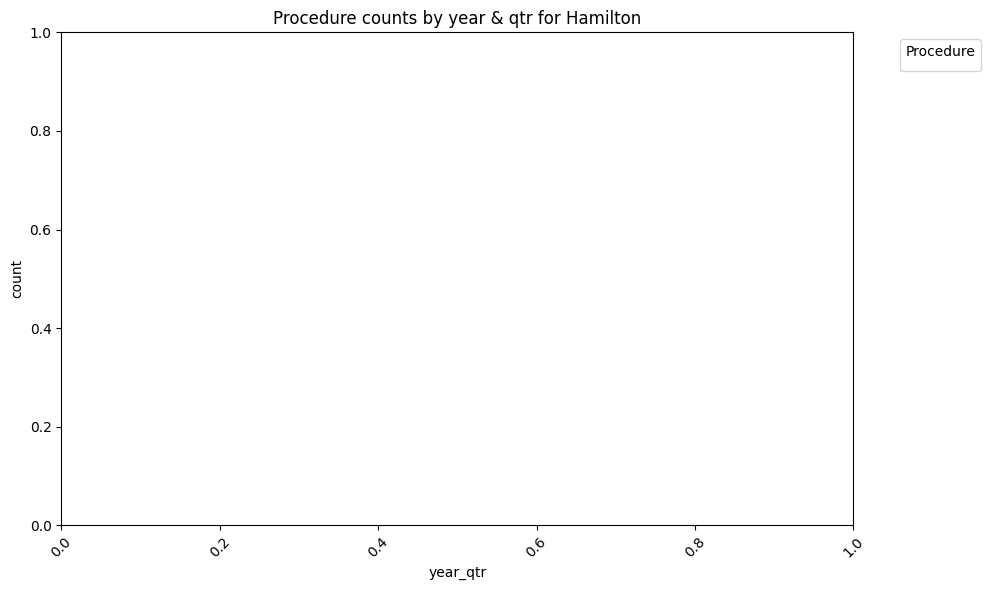

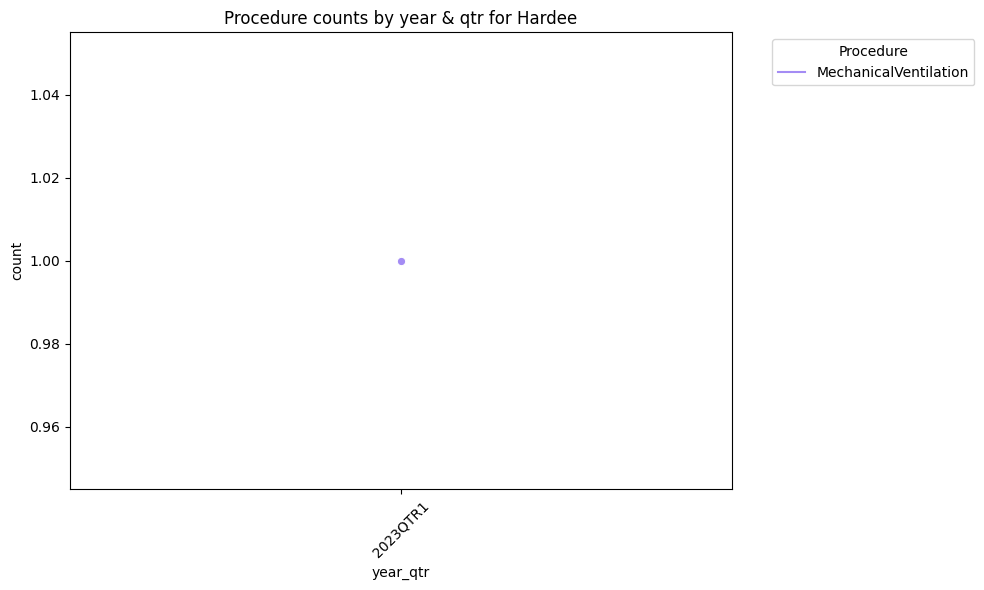

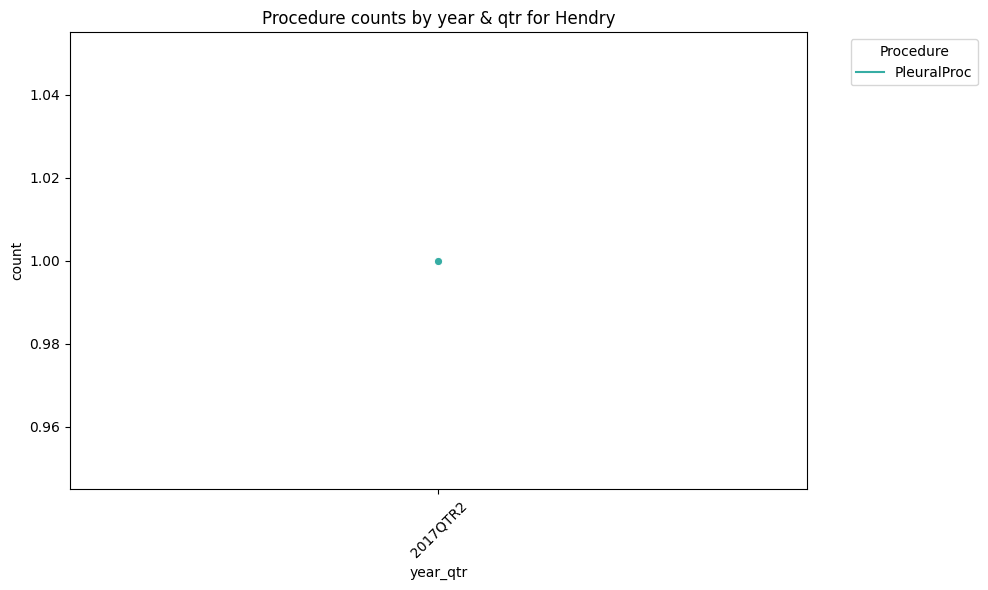

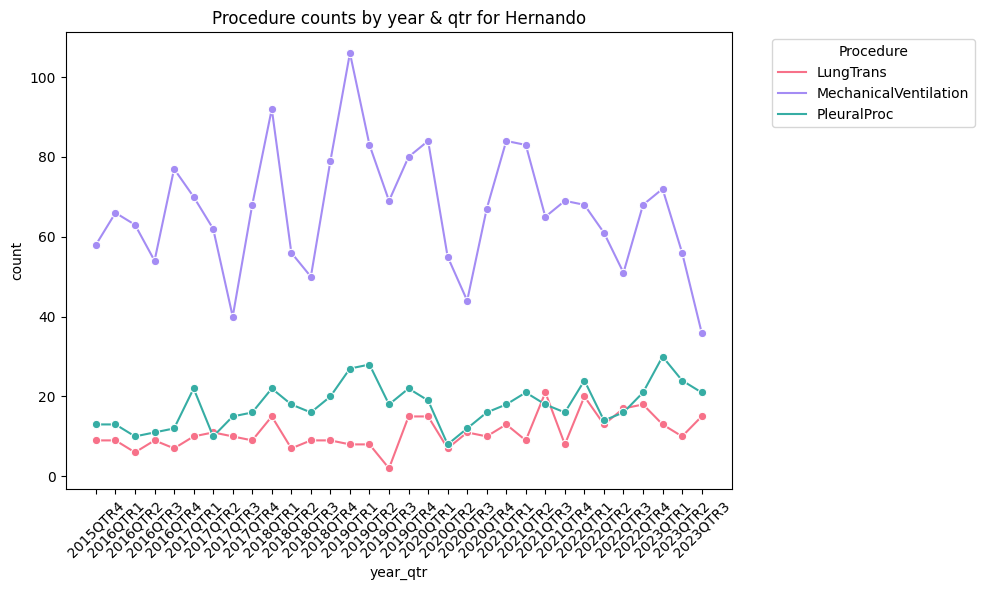

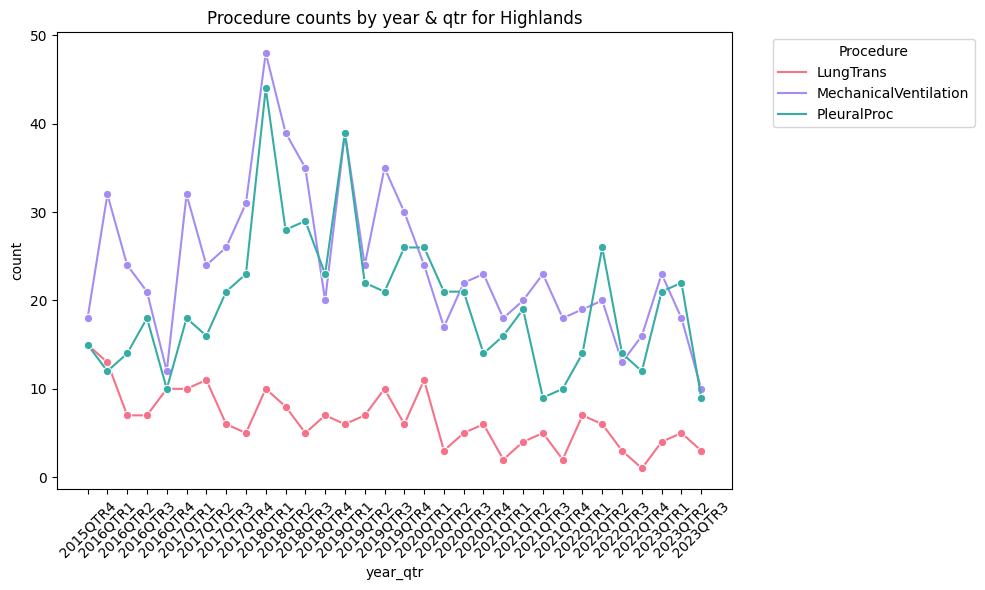

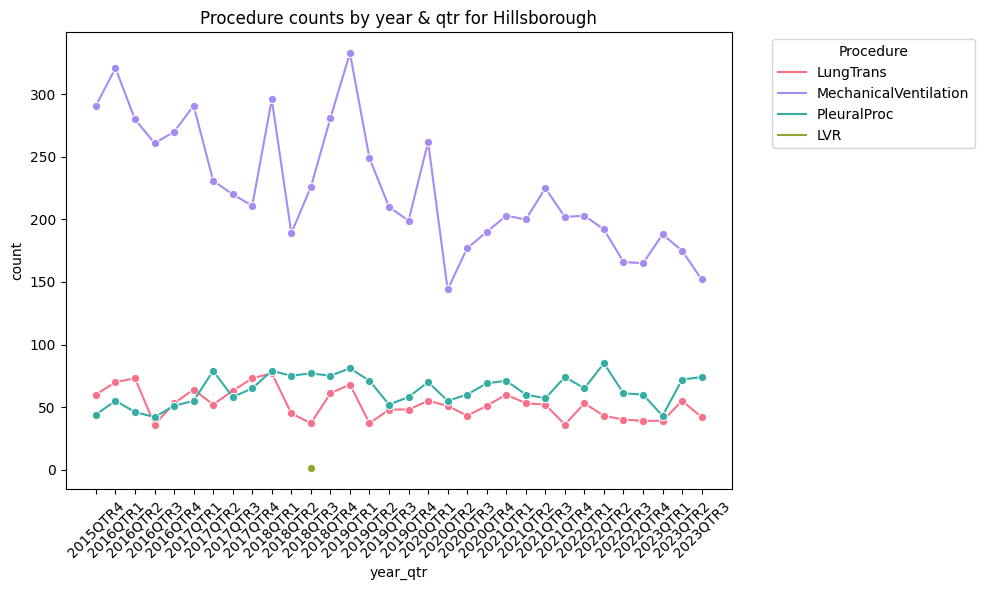

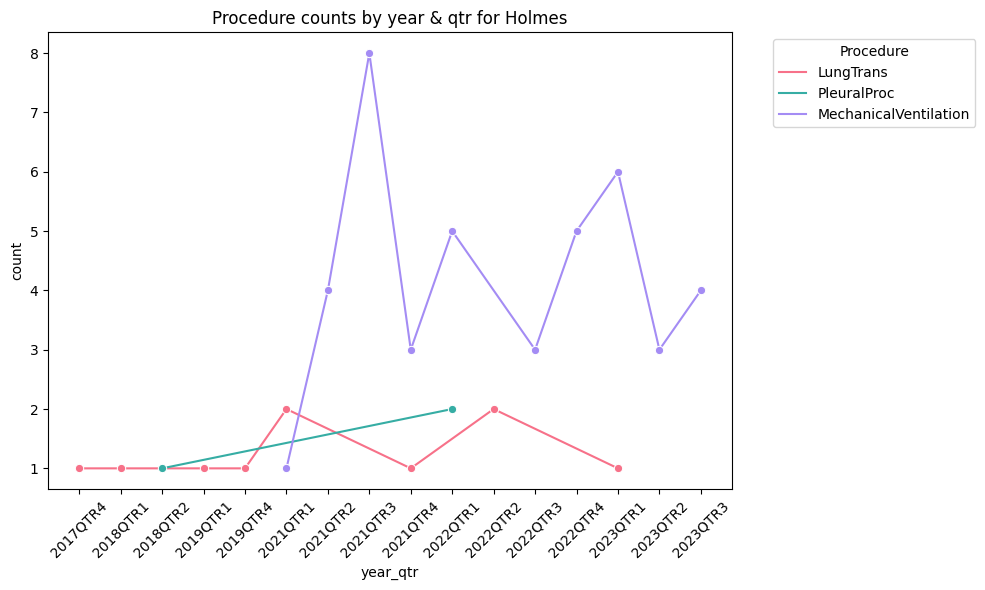

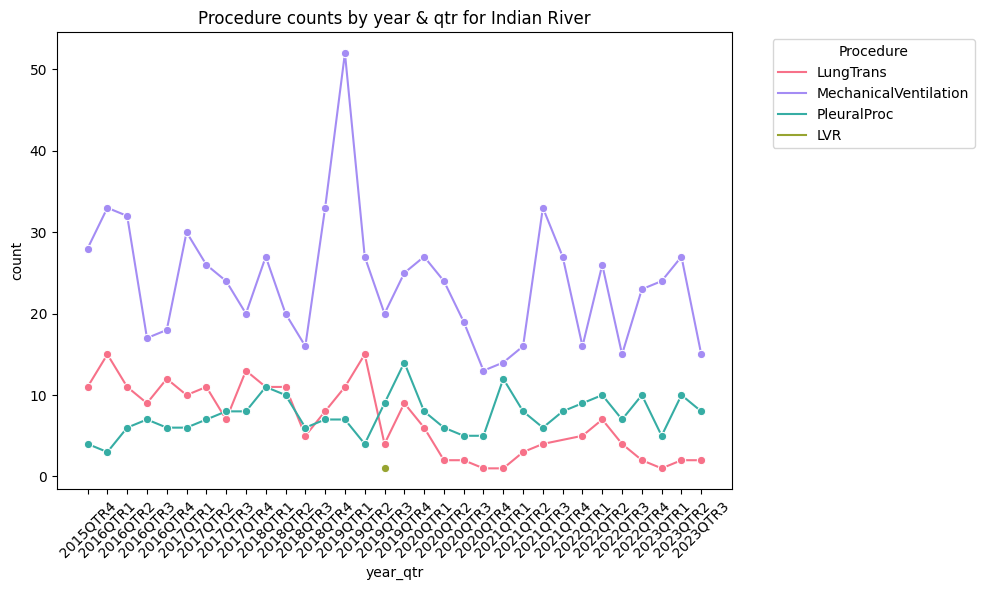

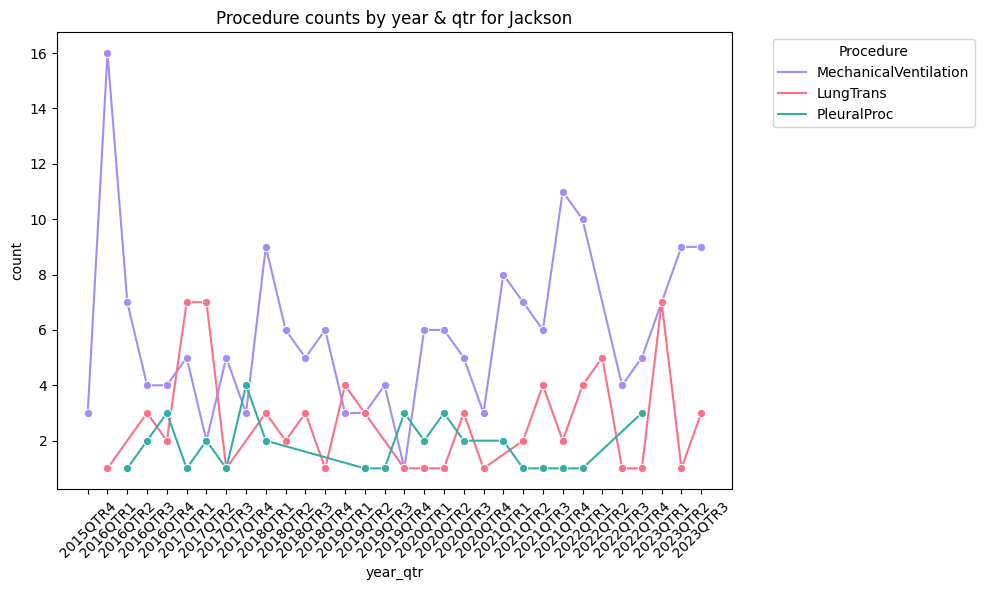

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


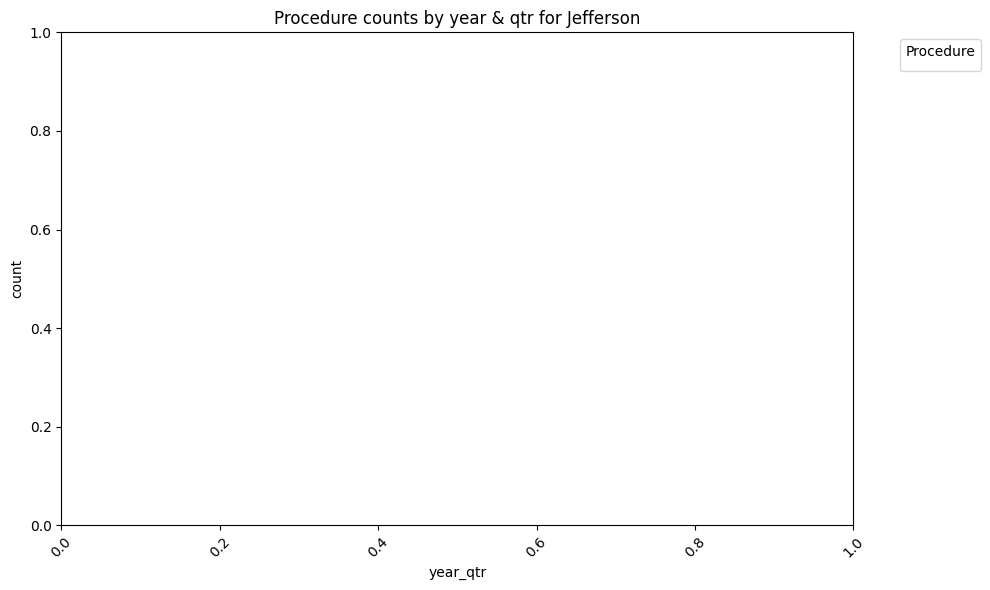

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


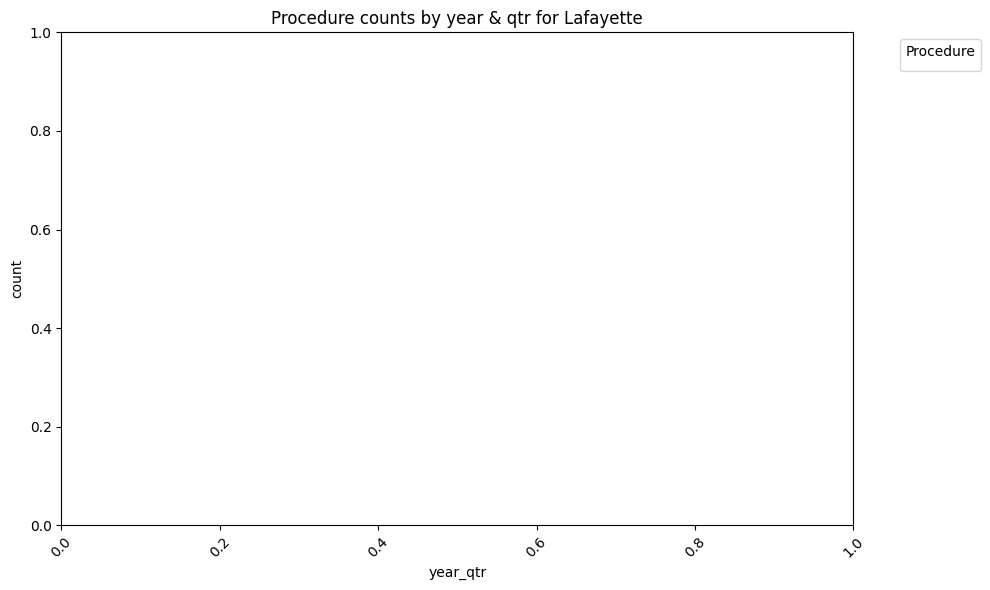

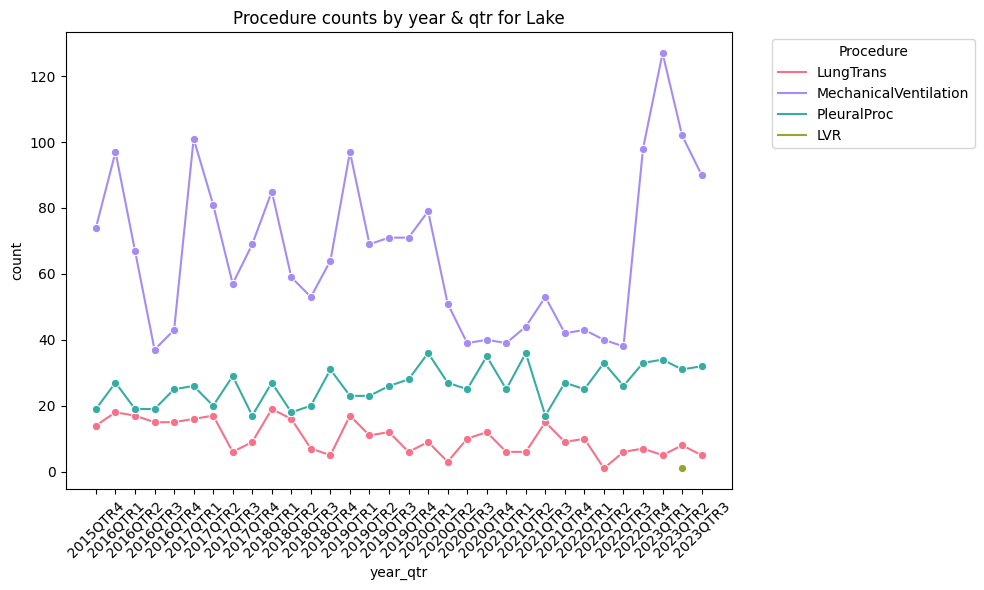

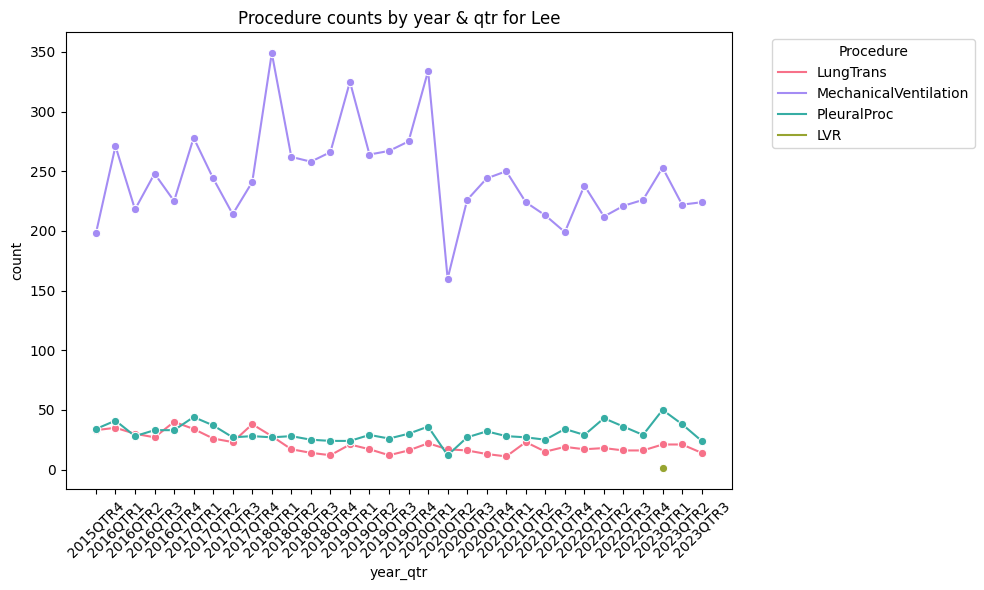

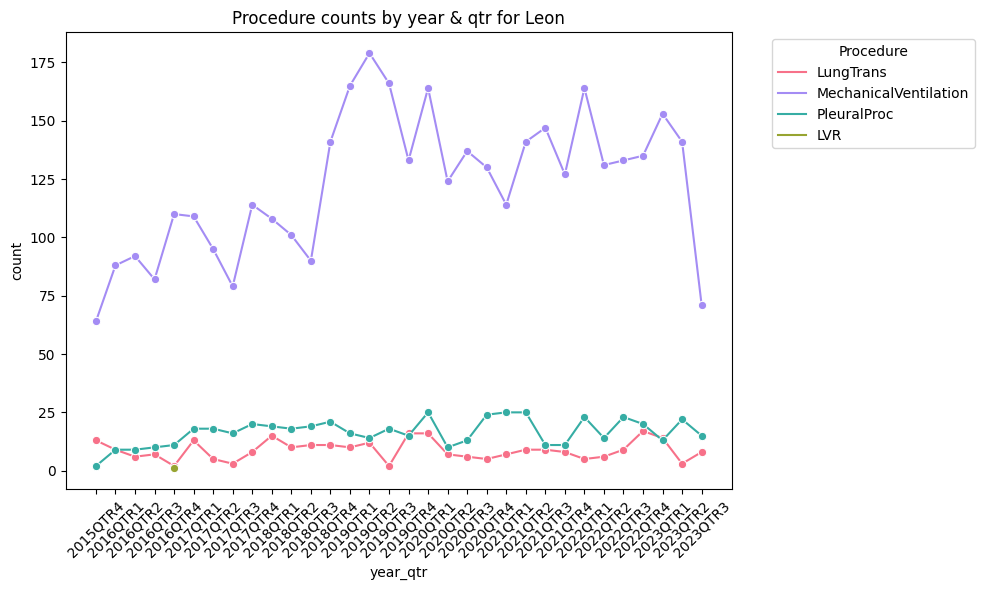

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


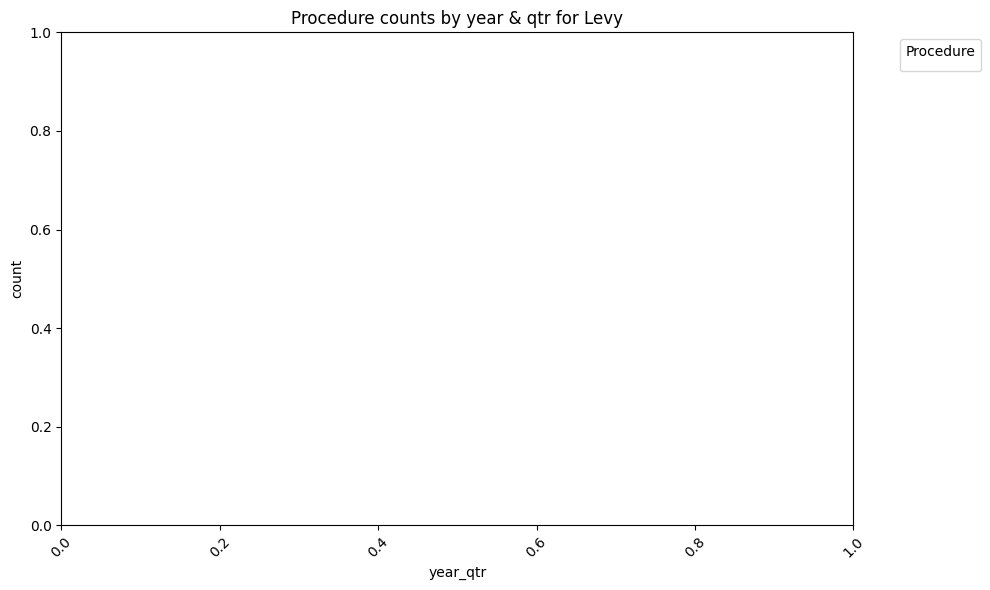

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


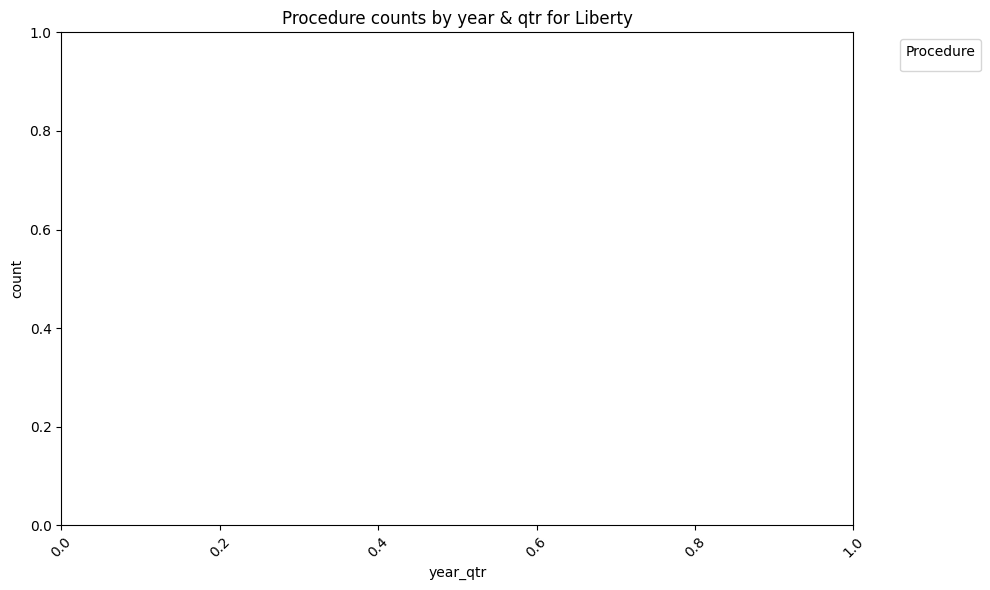

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


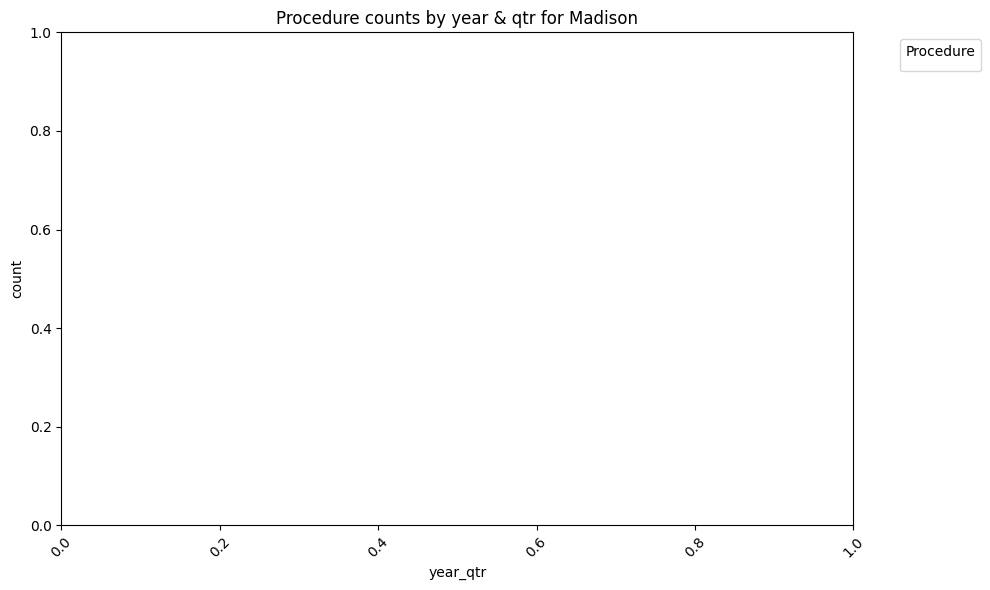

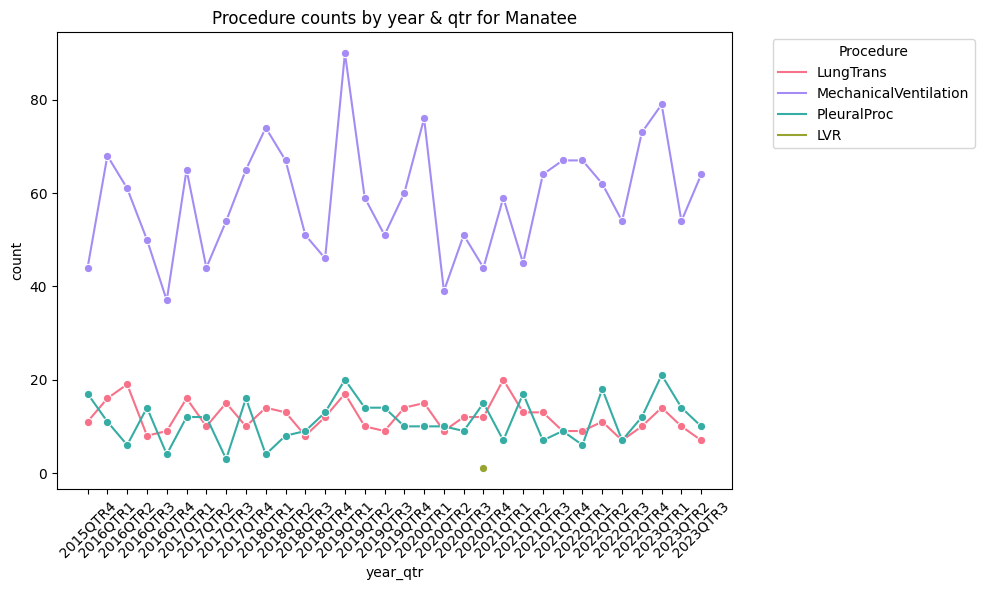

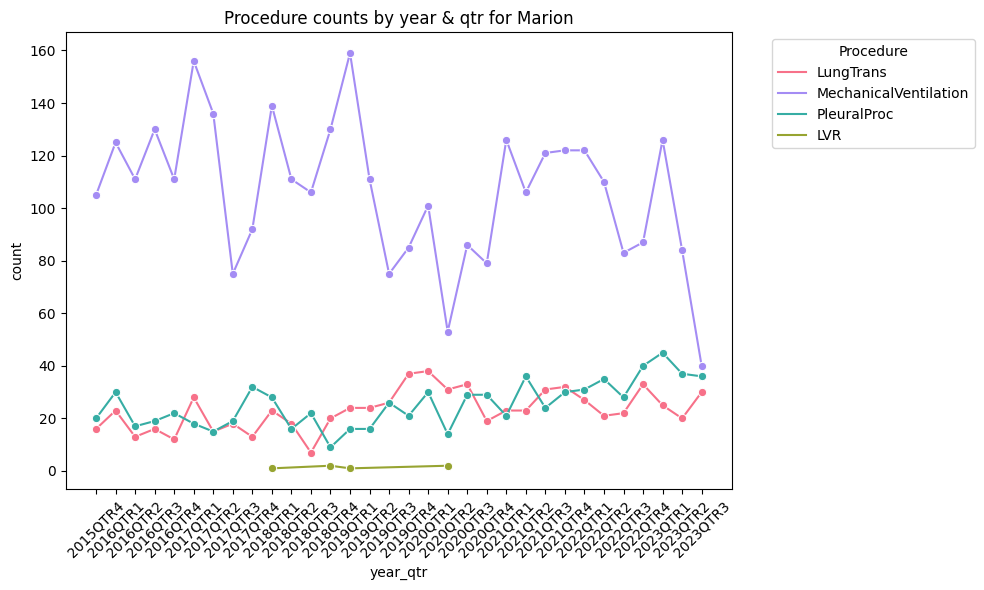

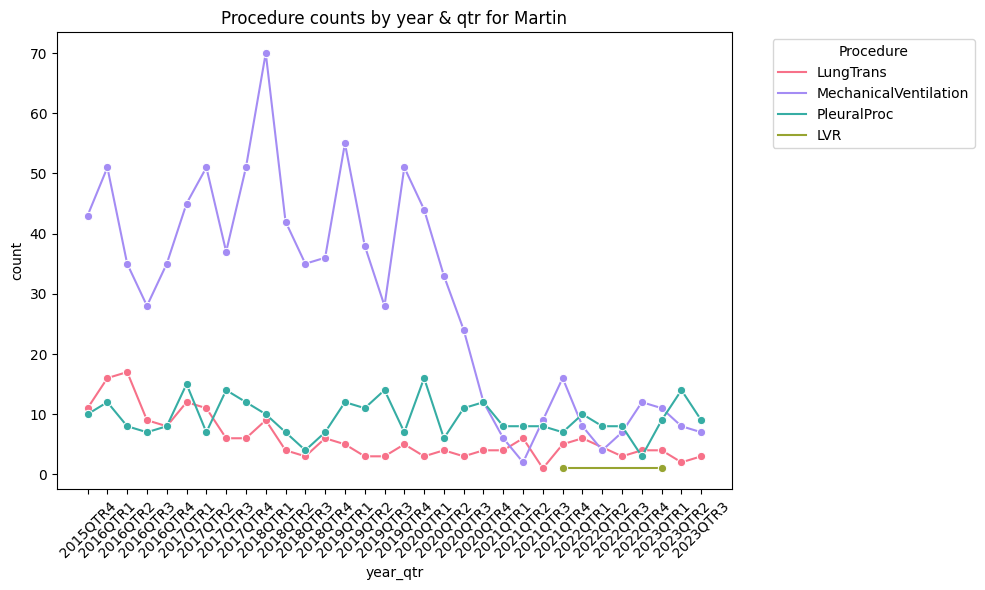

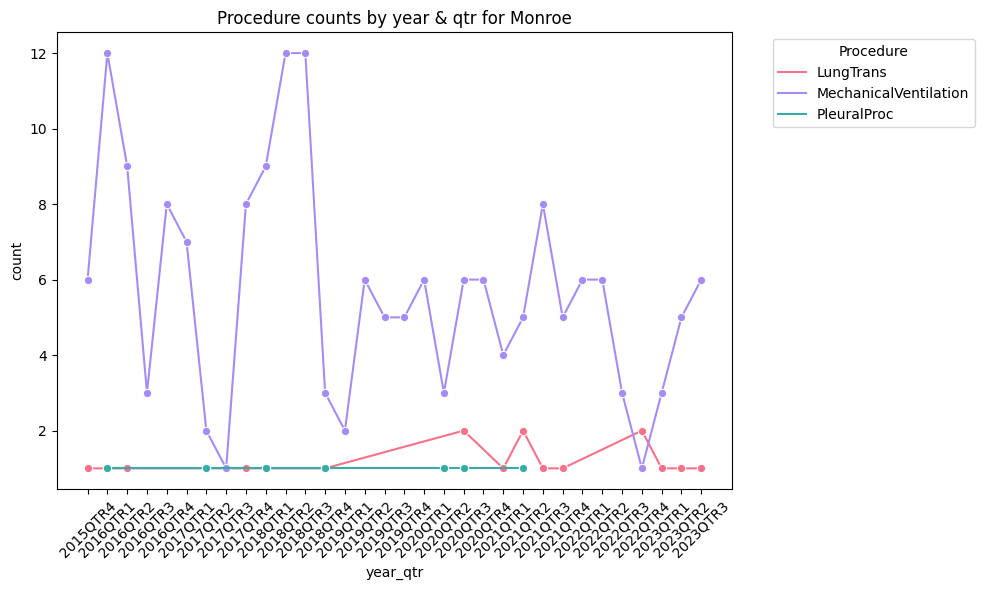

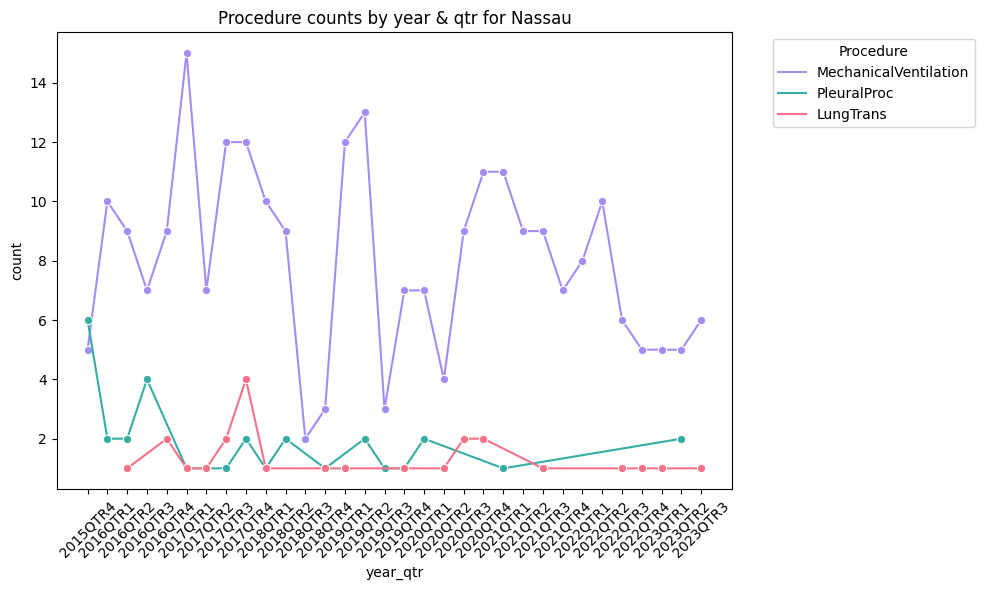

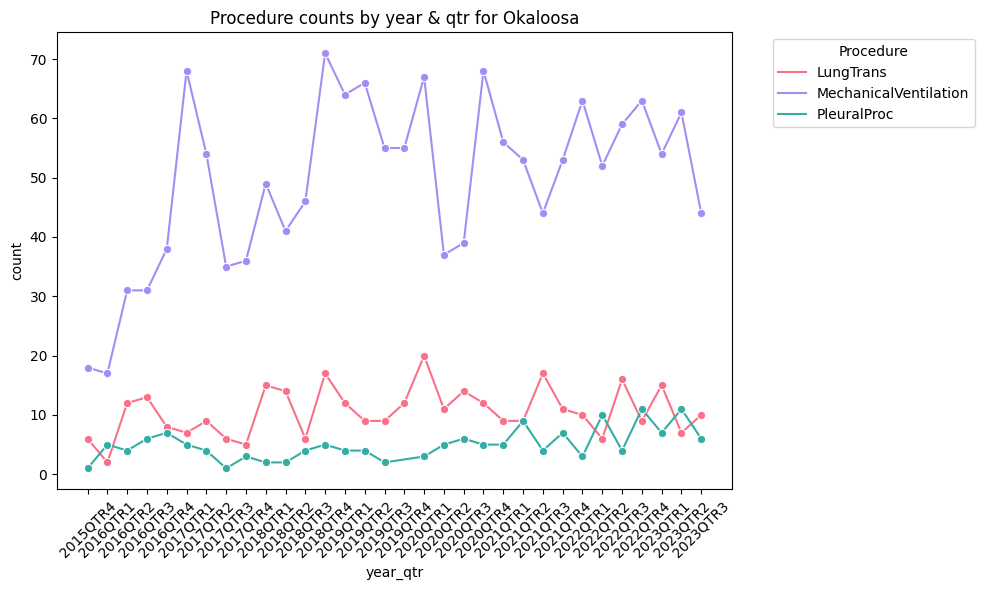

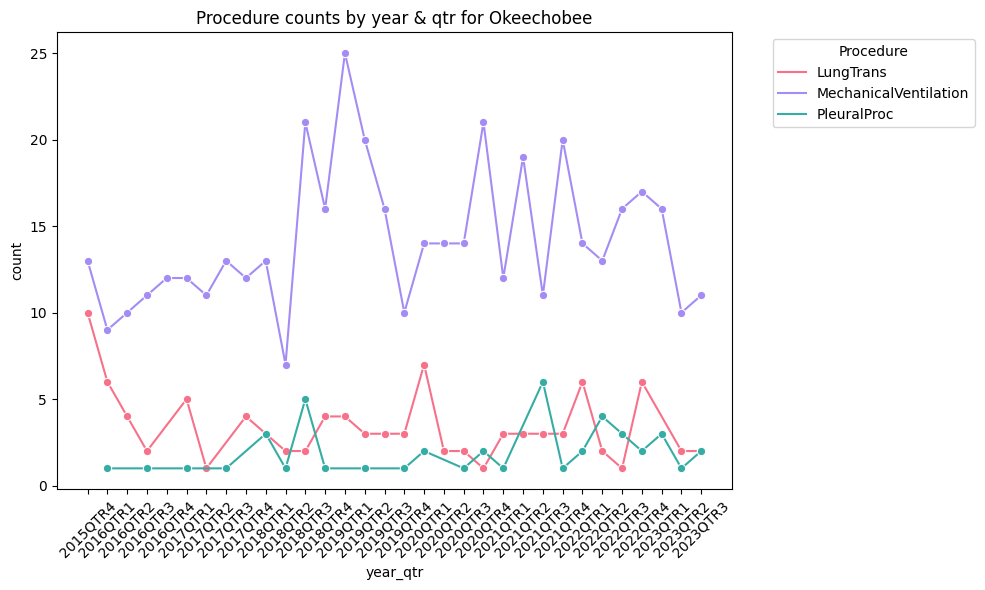

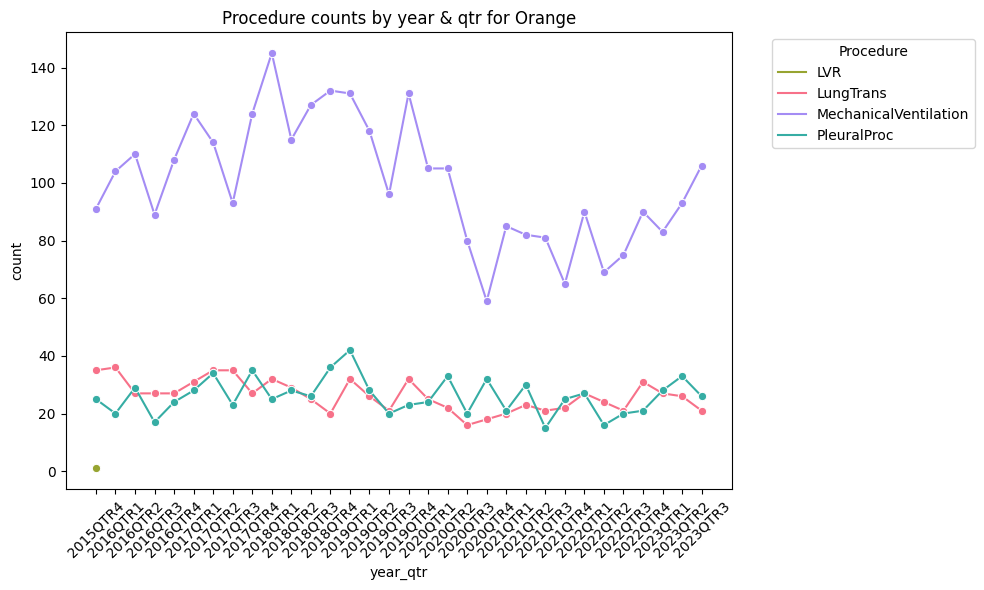

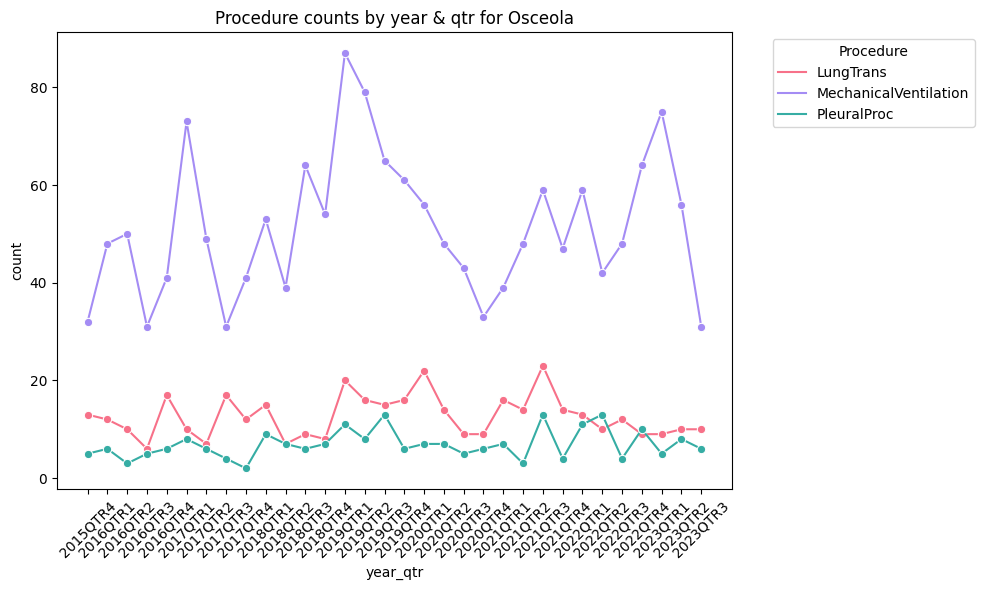

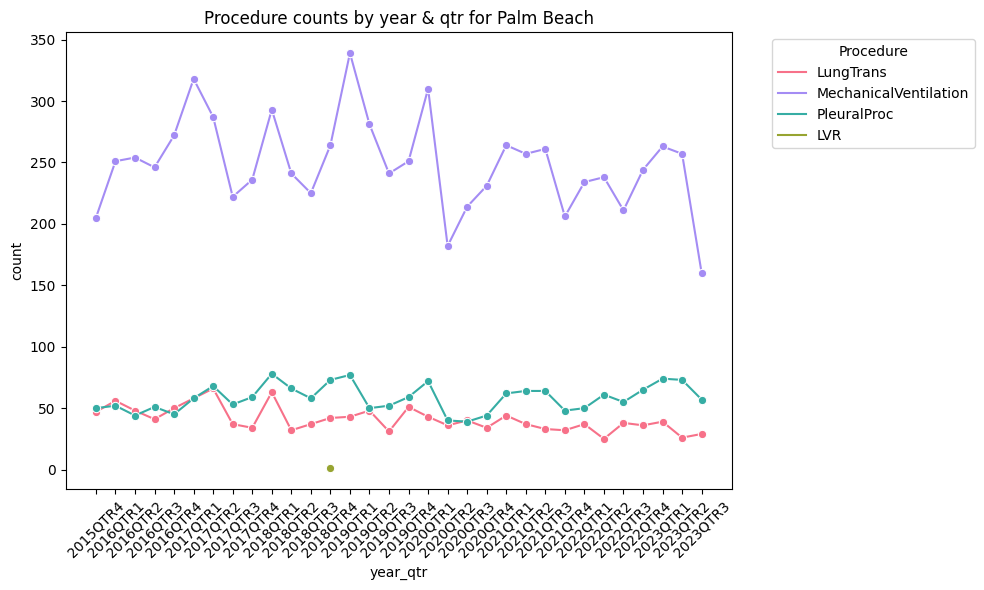

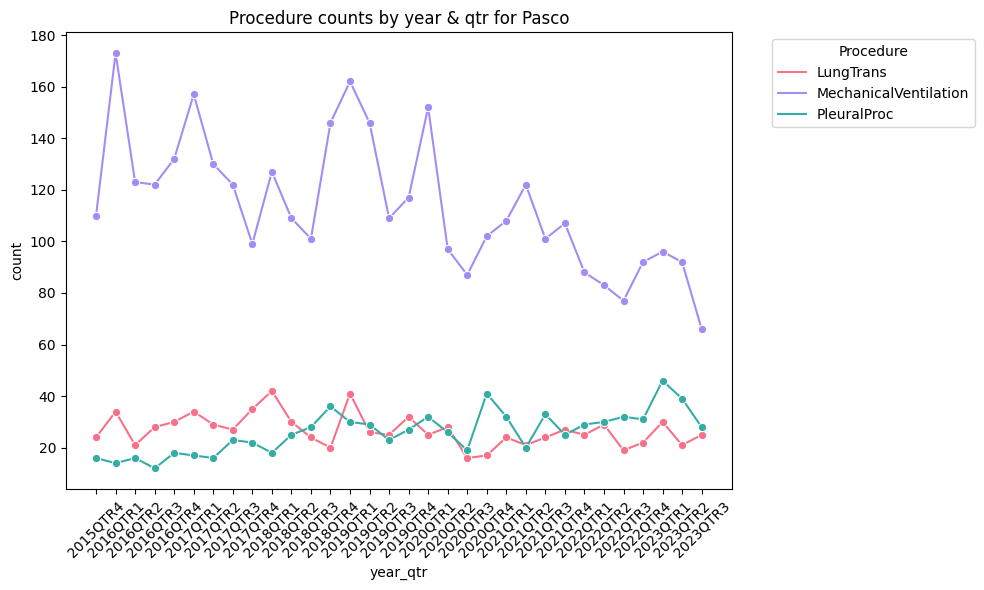

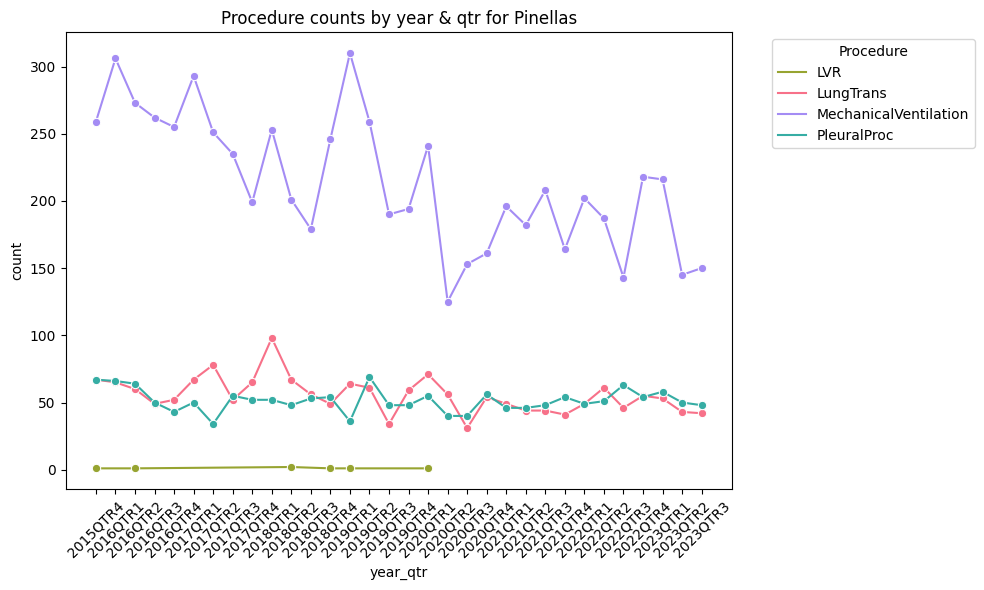

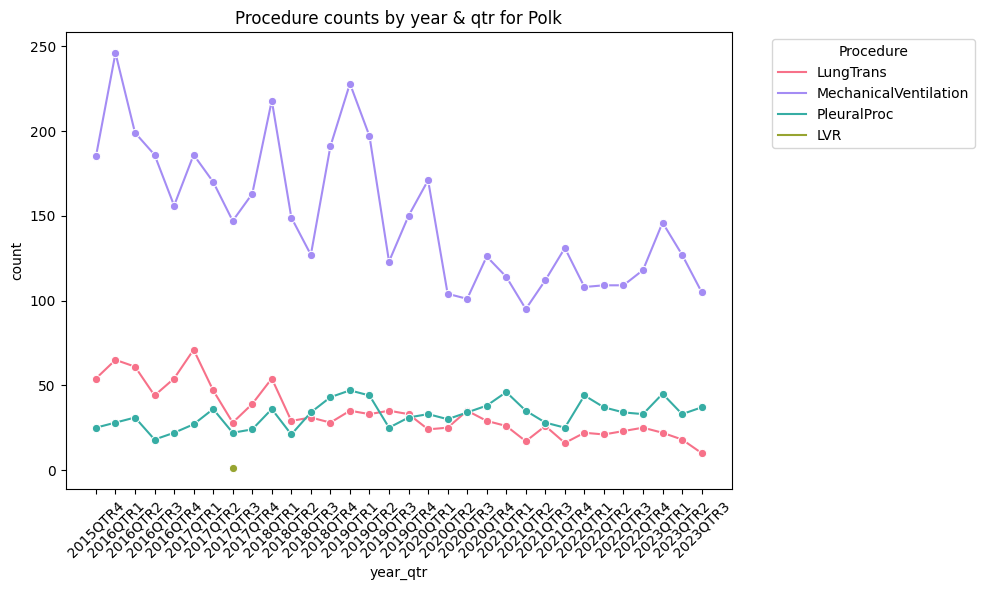

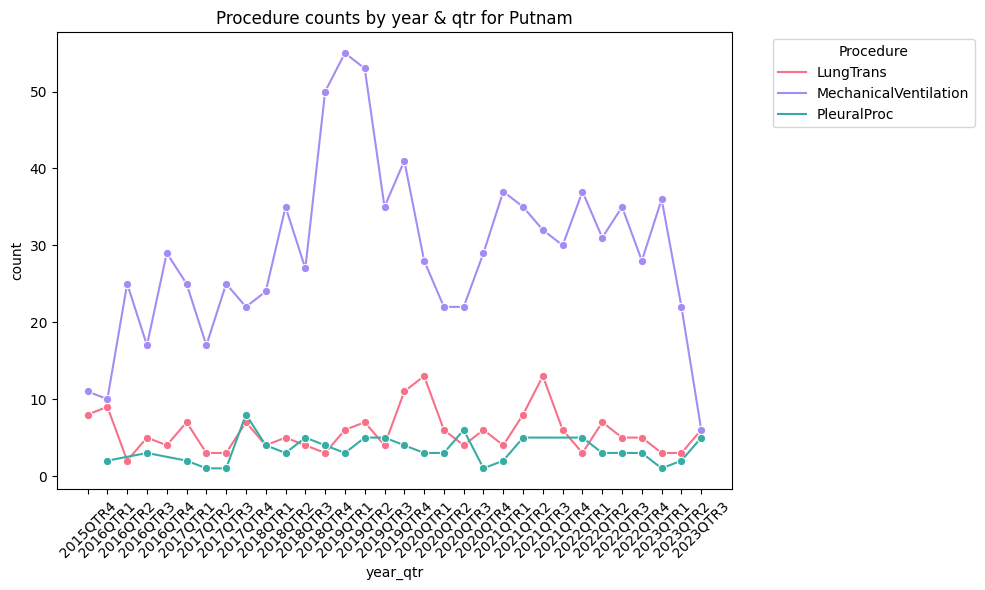

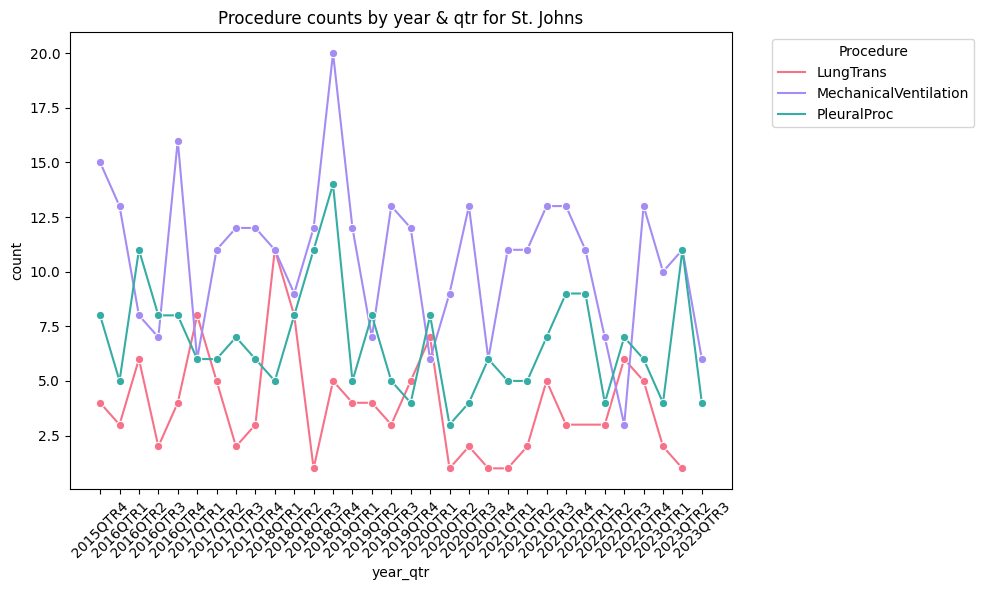

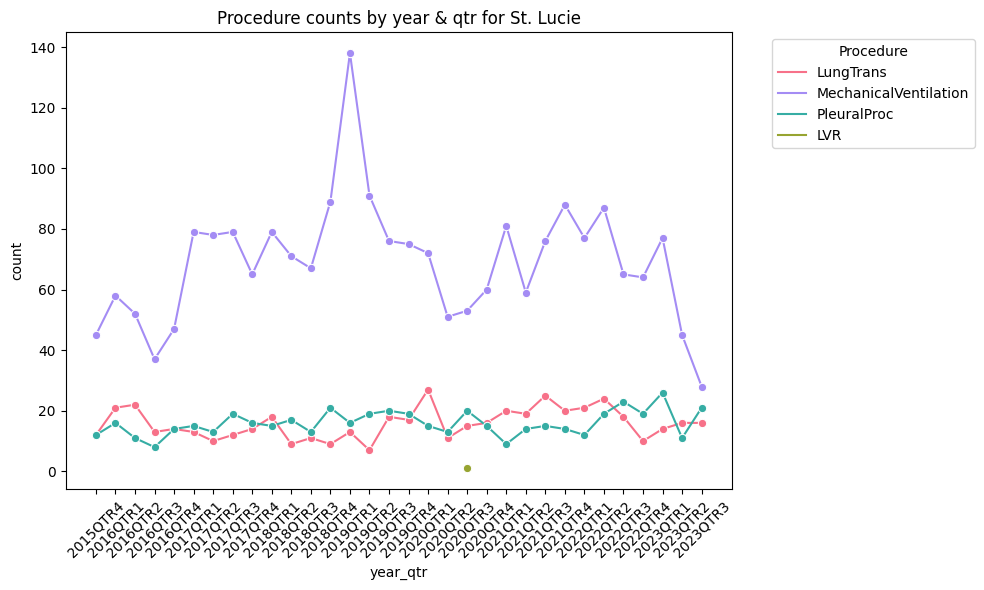

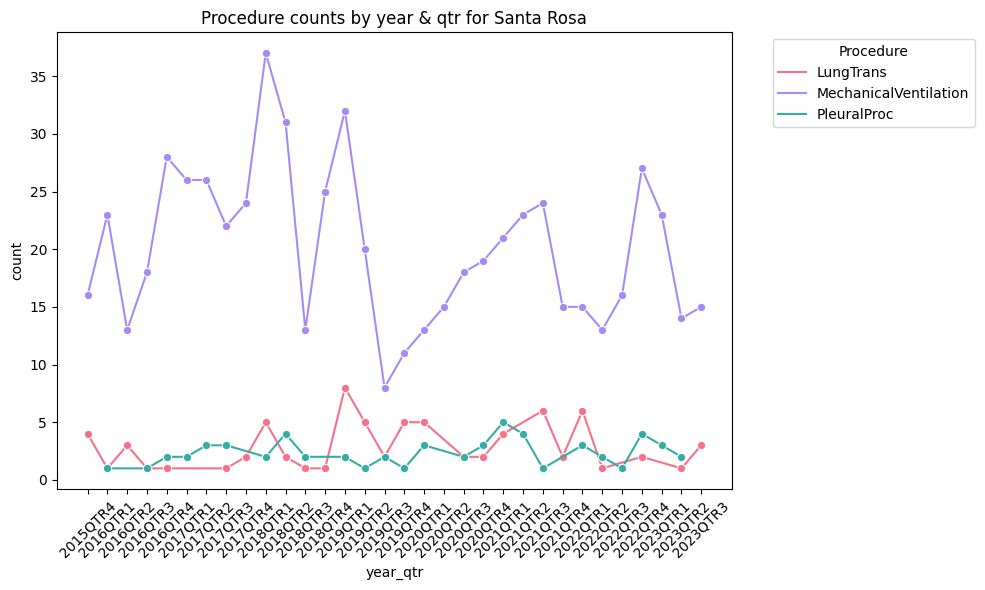

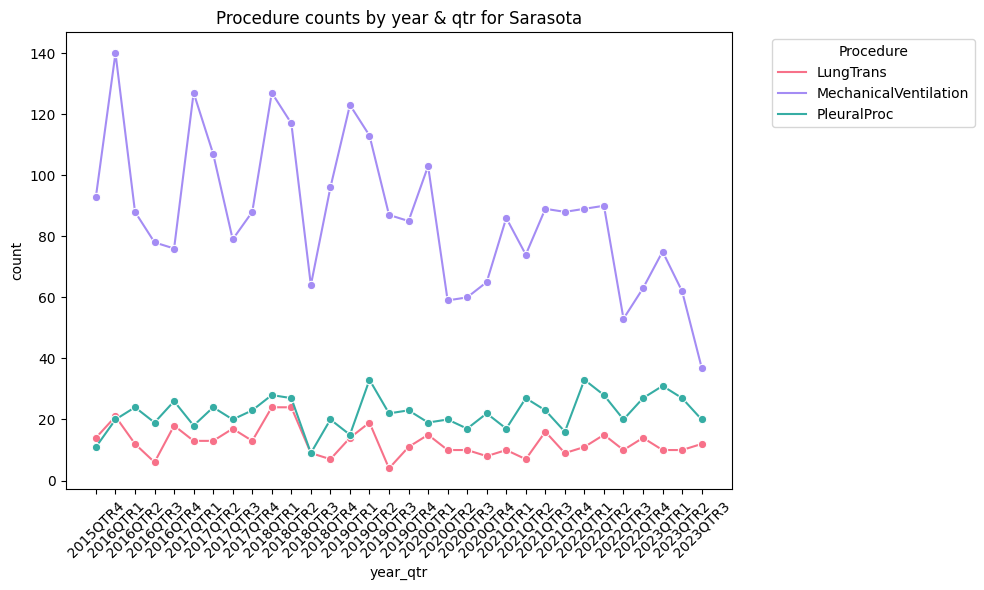

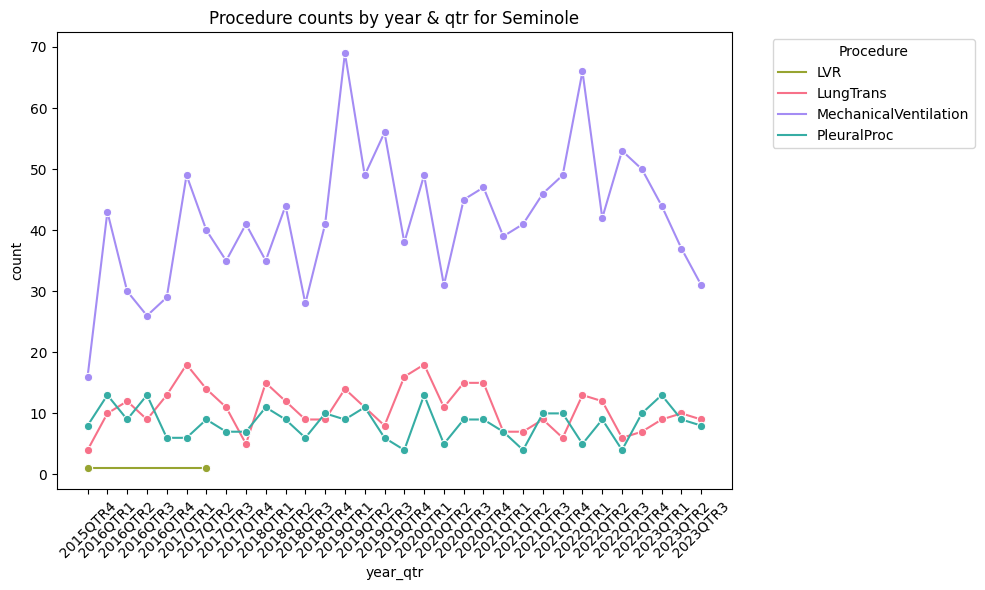

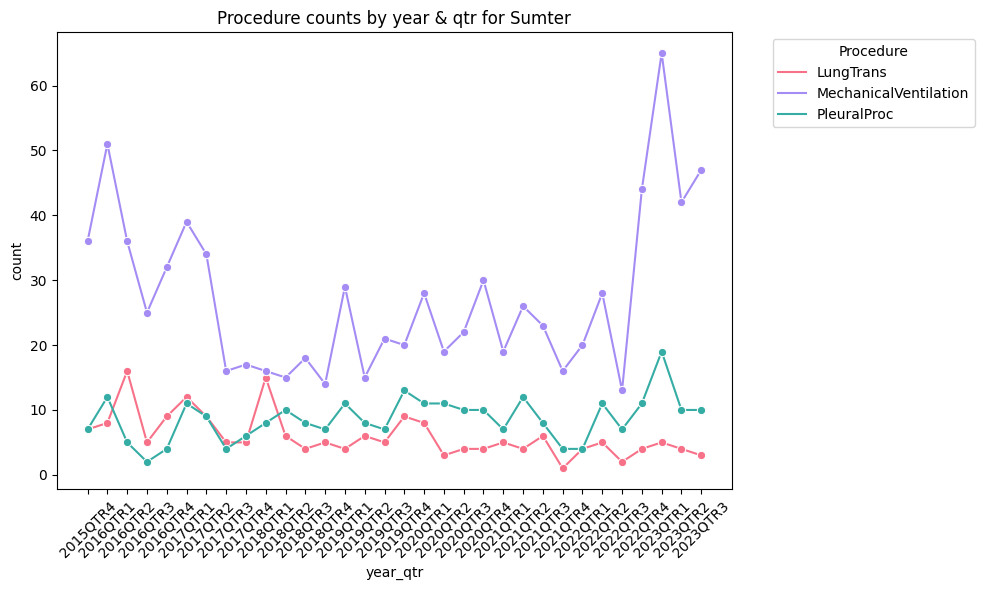

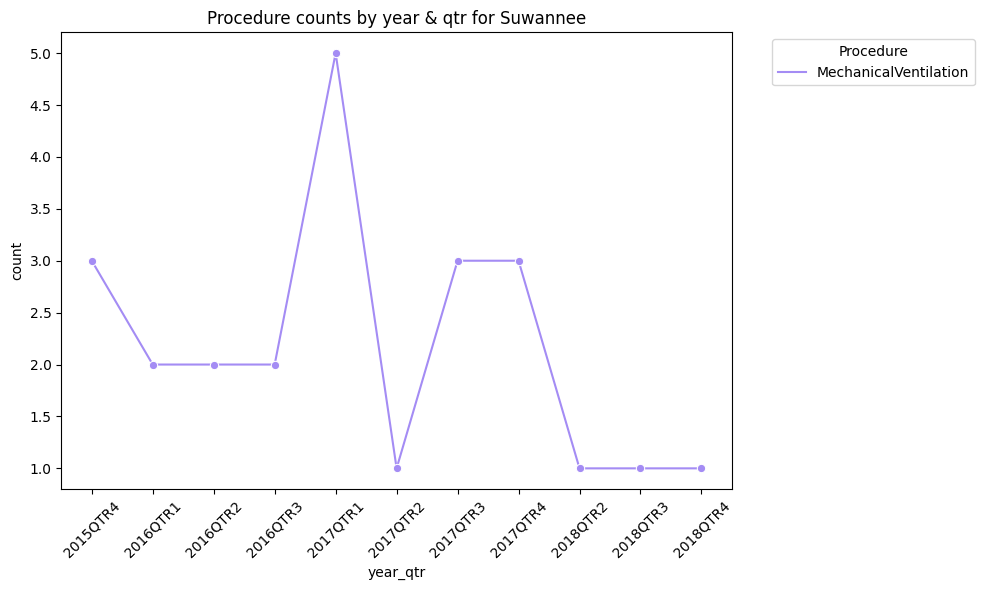

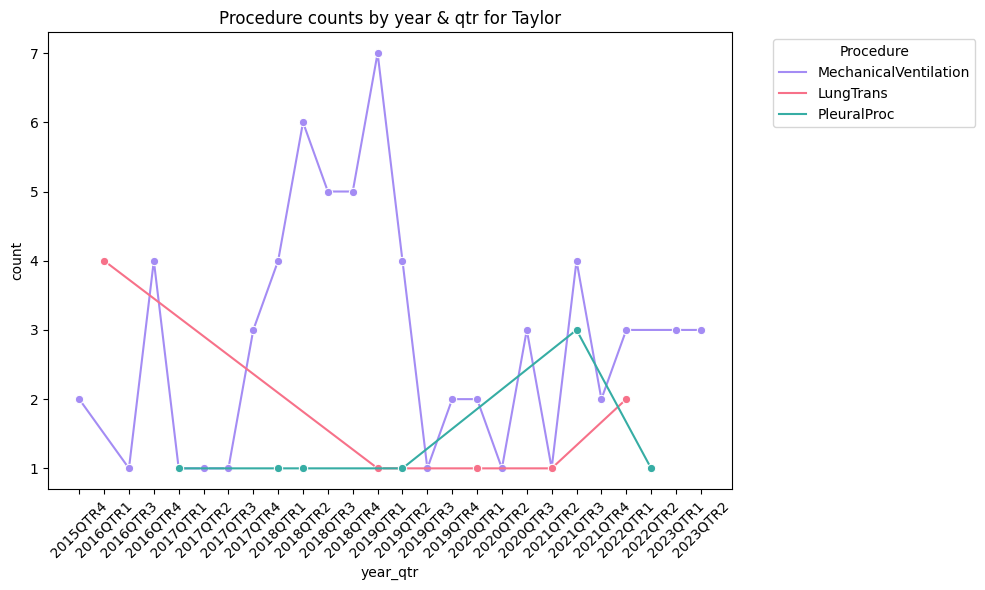

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


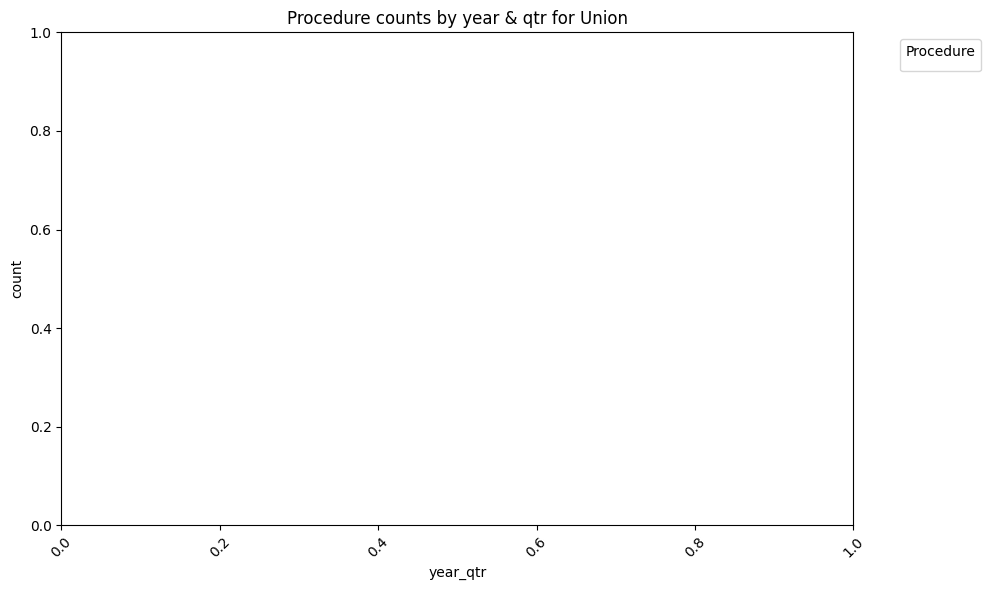

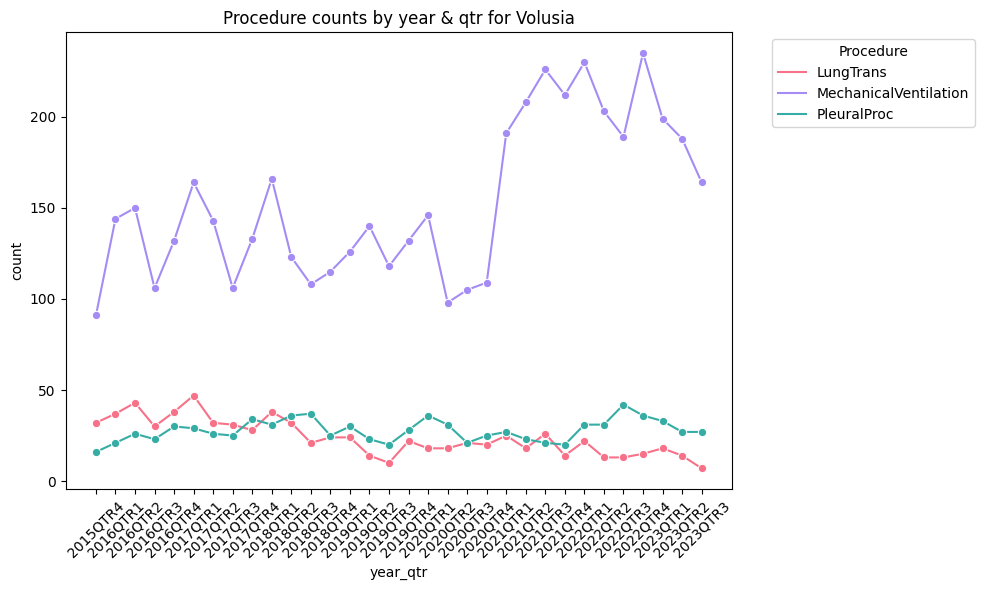

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


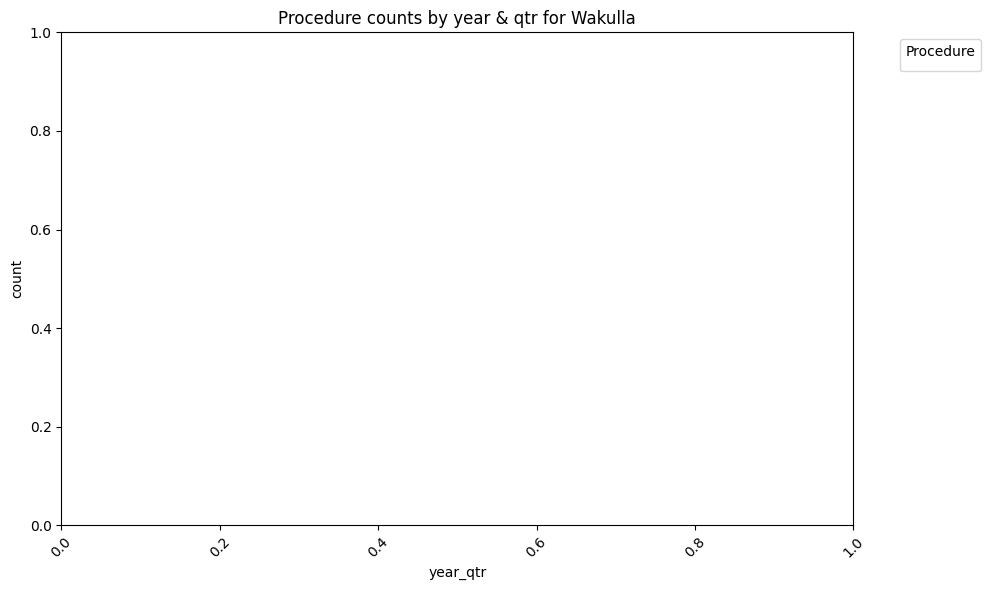

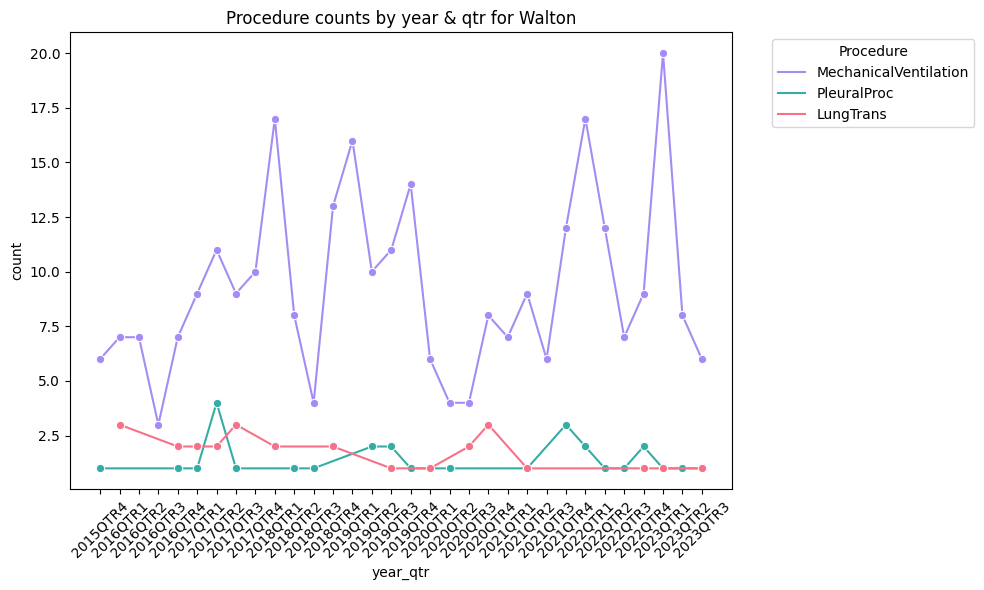

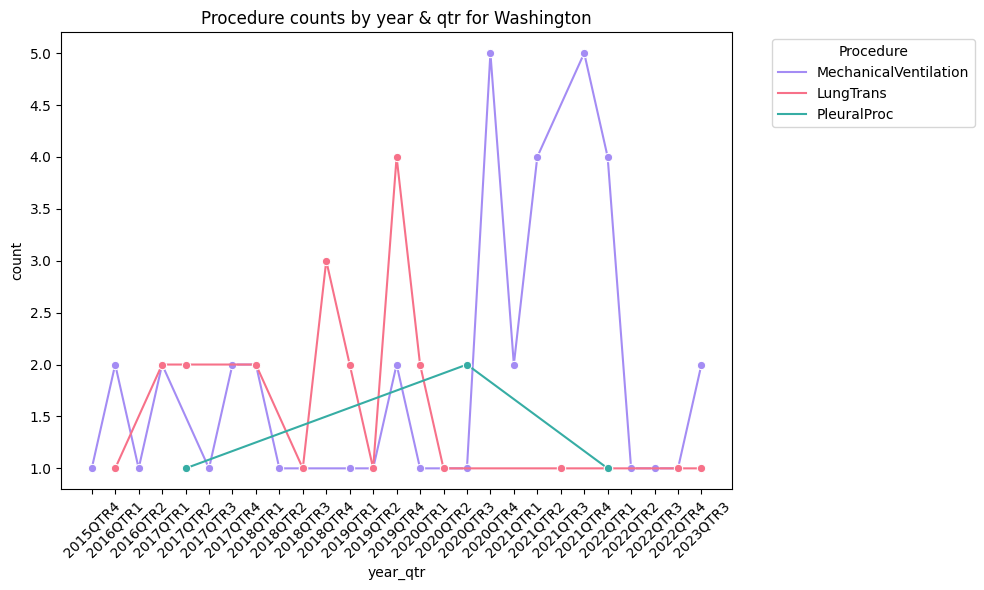

C:\Users\Sruthi\AppData\Local\Temp\ipykernel_22956\1510790613.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


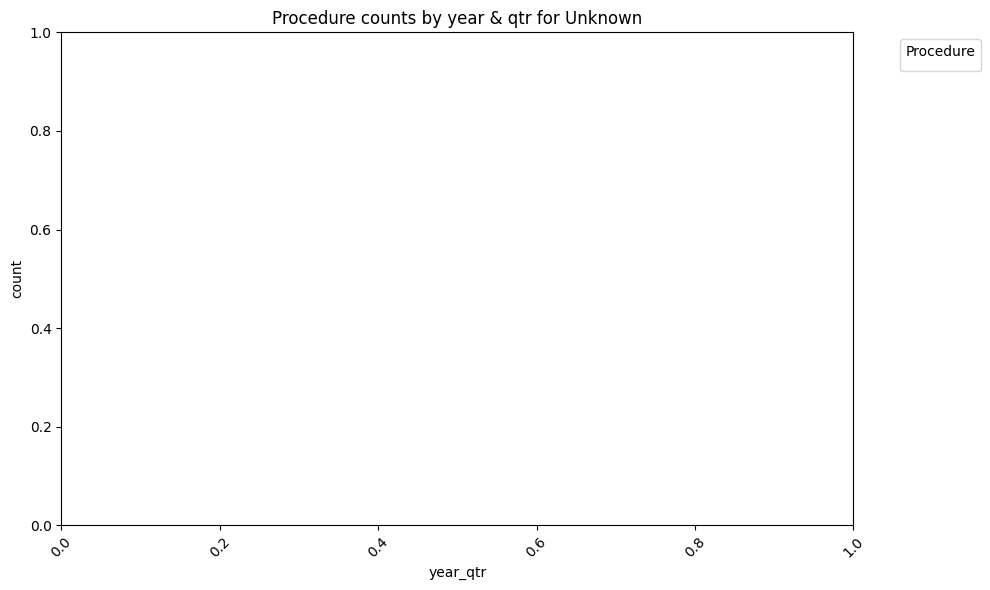

In [15]:

copd_inp_df["YEAR_QTR"] = copd_inp_df["YEAR"].astype(str) + "QTR" + copd_inp_df["QTR"].astype(str)
chd_inp_dia_agg_by_fac = copd_inp_df.groupby(["YEAR_QTR", "QTR", "FAC_COUNTY_NAME", "PROCEDURE"]).size().reset_index(name="PROC_COUNT")

treatments = ["LungTrans", "LVR", "PleuralProc","MechanicalVentilation"]
palette = sns.color_palette("husl", len(treatments))
treatment_colors = dict(zip(treatments, palette))

for county in county_dict.values():
    county_data = chd_inp_proc_agg_by_fac[chd_inp_proc_agg_by_fac['FAC_COUNTY_NAME'] == county]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=county_data, x="YEAR_QTR", y="PROC_COUNT", hue="PROCEDURE", marker='o', palette=treatment_colors)

    plt.title(f"Procedure counts by year & qtr for {county}")
    plt.xlabel("year_qtr")
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.legend(title="Procedure", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout()
    plt.show()